#PART 0: Introduction

##Project Overview

* **Project's title:** **IMAGE SEGMENTATION WITH CIFAR10 DATASET**
* **Authors:** Chris Rickard​, Thi Kim Tuyen Ha​, Bee Boossadee​, Aida Pouradam, Chun Hin Chan​
* **Unit:** COS80027 Machine Learning - Semester 1, Swinburne University of Technology
* **Creation Date:** 01/06/2023

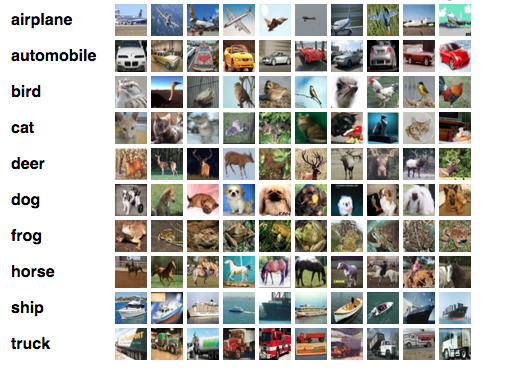

**1. Project background & objective**

After studying certain machine learning & deep learning frameworks for this unit, we aim to utilise these knowledge in this demonstration to achieve 02 main goals:
- Applying machine learning and deep learning techniques to develop effective models for image classification using the CIFAR-10 dataset. This process involves various stages, starting from data collection, data partitioning, data preprocessing, exploratory data analysis, model construction, and thorough evaluation of model performance.
- Comparing the outcomes of deep learning models with those of traditional machine learning models in the context of image classification. We will explore the differences, advantages, and disadvantages between these approaches and engage in a discussion about their respective strengths and limitations.

**2. Documents:**

This big project contains 02 notebooks & 1 report:
- For Deep Learning Model (this notebook): https://colab.research.google.com/drive/1mfGY_Ia7A4wYIs1akJ3lT21mon1MxCnz#scrollTo=22cgewfzRfWl
- For Machine Learning Model: https://colab.research.google.com/drive/1RYCEtKs7HvqrtXF66lF17SBunBMpjQ7u
- The Task 3: Comparison between the ML and DL models is presented in appendix.pdf report

##Project Team
<p>
<b>
Self-assessment of factor
</b>
</p>
<li> Thi Kim Tuyen Ha - 1.0
<li> Bee Bossadee - 1.0
<li> Chris Rickard - 1.0
<li> Aida Pouradam - 1.0
<li> CHun Hin CHan - 1.0



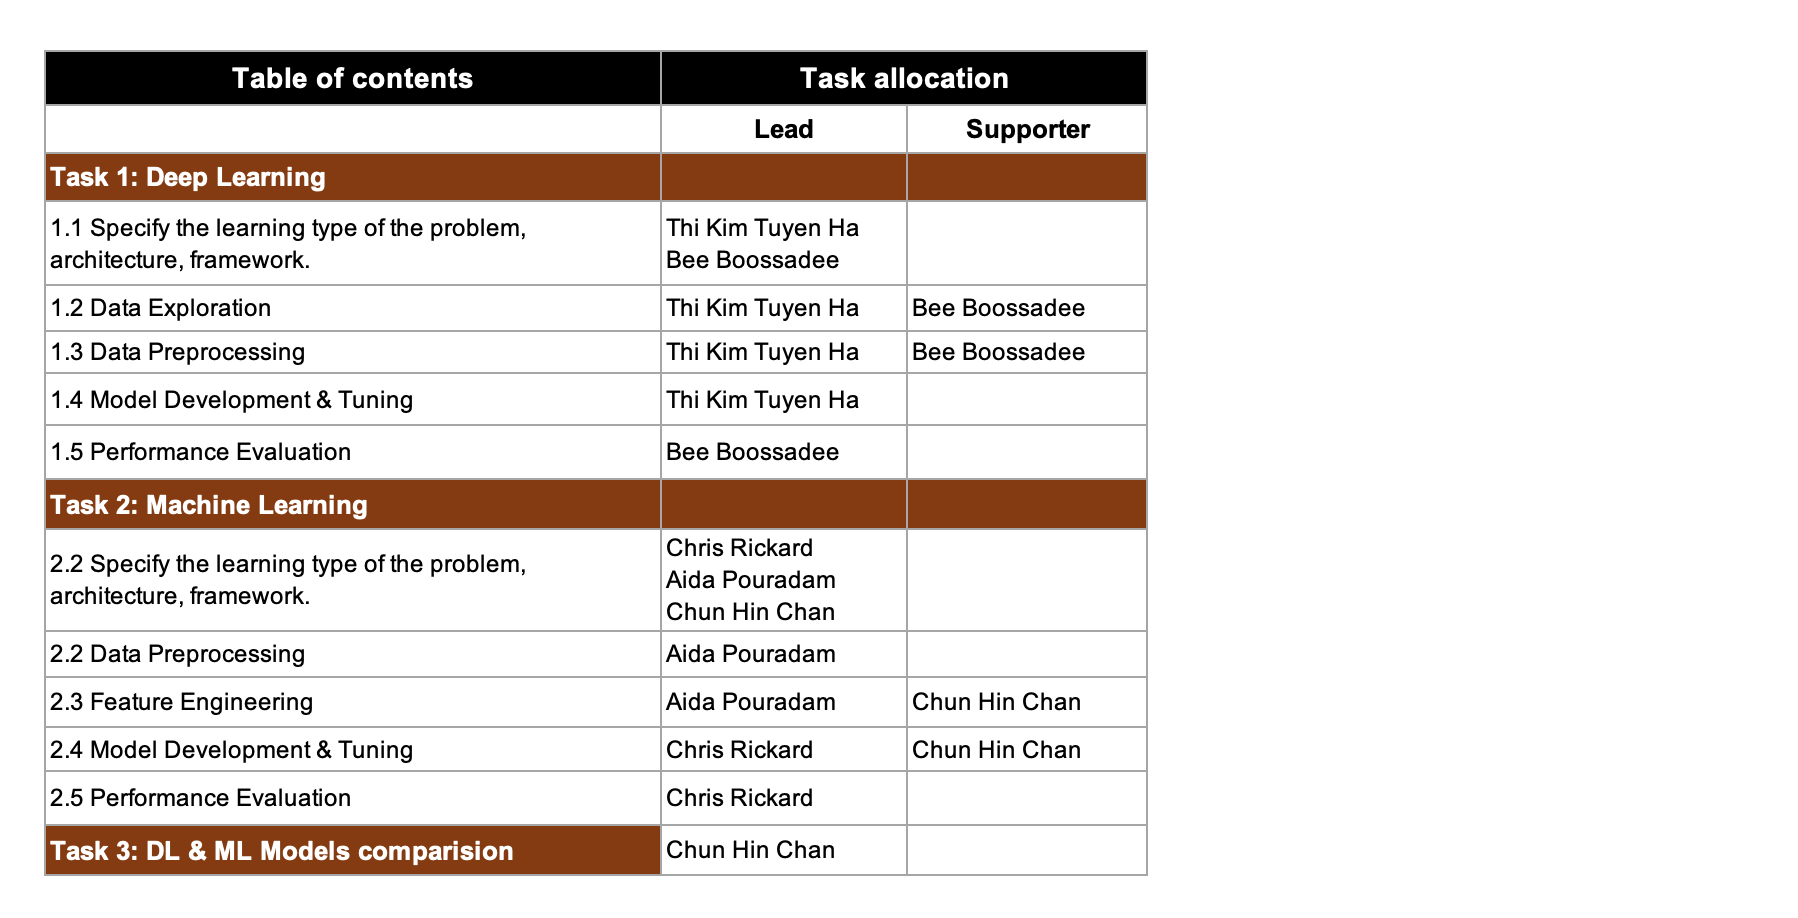

#PART 1: Data Collection

##1.1 Import libraries

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from tensorflow import keras
from matplotlib import pyplot
from matplotlib import pyplot
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kerastuner.tuners import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from kerastuner import HyperModel

<ipython-input-2-92acb59b8b6e>:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


##1.2 Collect CIFA10 data for train, validation and test set

In [ ]:
(X_train, Y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# define class labels
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def plot_class_distribution(class_names, class_counts, title):
    # Define the colors from the Paired palette
    colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']
    # Plot the class distribution
    plt.bar(class_names, class_counts, color=colors)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(f'Class distribution of {title}')
    plt.xticks(rotation=90)
    plt.show()

###Check number of train set after loading

TRAIN SET
Total number of samples: 50000
Number of labels: 10
Number of samples for each label:
- airplane: 5000 samples
- automobile: 5000 samples
- bird: 5000 samples
- cat: 5000 samples
- deer: 5000 samples
- dog: 5000 samples
- frog: 5000 samples
- horse: 5000 samples
- ship: 5000 samples
- truck: 5000 samples
--------



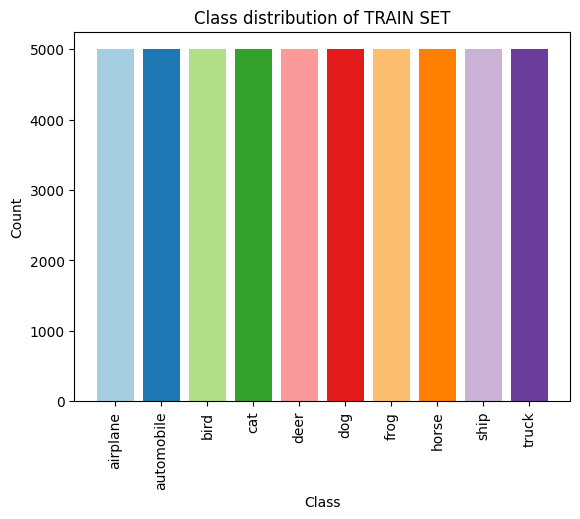

In [ ]:
# Count the number of labels and data samples in the train set
train_labels = len(set(Y_train.flatten()))
train_samples = len(X_train)
# Count the number of samples for each label in the train set
train_counts = np.bincount(Y_train.flatten(), minlength=len(class_names))
# Print the number of data for each label in the train set
title = 'TRAIN SET'
print(title)
print(f'Total number of samples: {train_samples}')
print(f'Number of labels: {train_labels}')
print('Number of samples for each label:')
for i, count in enumerate(train_counts):
    print(f'- {class_names[i]}: {count} samples')
print('--------')
print()
plot_class_distribution(class_names, train_counts, title)

###Check number of test set after loading

TEST SET
Total number of samples: 10000
Number of samples for each label:
- airplane: 1000 samples
- automobile: 1000 samples
- bird: 1000 samples
- cat: 1000 samples
- deer: 1000 samples
- dog: 1000 samples
- frog: 1000 samples
- horse: 1000 samples
- ship: 1000 samples
- truck: 1000 samples
--------
Total number of samples: 10000



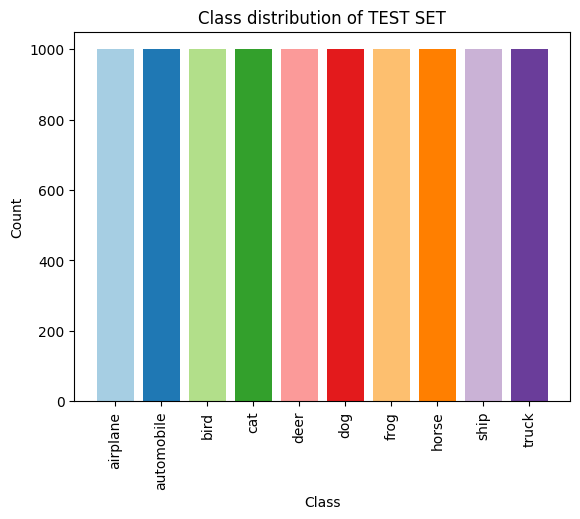

In [ ]:
# Count the number of labels and data samples in the test set
test_labels = len(set(y_test.flatten()))
test_samples = len(x_test)
# Count the number of samples for each label in the test set
test_counts = np.bincount(y_test.flatten(), minlength=len(class_names))
# Print the number of data for each label in the train set
title = 'TEST SET'
print(title)
print(f'Total number of samples: {test_samples}')
print('Number of samples for each label:')

for i, count in enumerate(test_counts):
    print(f'- {class_names[i]}: {count} samples')
print('--------')
print(f'Total number of samples: {test_samples}')
print()
plot_class_distribution(class_names, test_counts, title)

**Findings:**
- The CIFAR10 dataset is successfully loaded 60000 32x32 color images (RGB), divided into 10 classes with a well-defined train and test dataset:
 - 50000 images for the training set
 - 10000 for the test set.
 
- Train set and test set have balanced classes distribution
- The images are indeed square with 32×32 pixels and color, with 03 channels (RGB)

#PART 2: Data Exploration

##Randomly inspect a image

Class number: 3 - Class name: cat
------
Image height: 32
Image width: 32
(32, 32, 3)


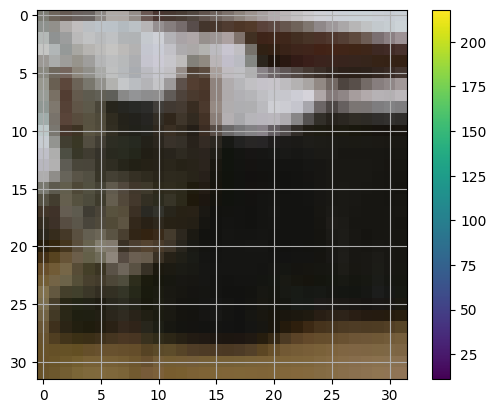

In [ ]:
# inspect the data in the array
index = 9 
image = X_train[index]

print("Class number: %s - Class name: %s" % (Y_train[index][0], class_names[Y_train[index][0]]))
print("------")
# Print the height and width of the image
height, width, _ = image.shape
print(f"Image height: {height}")
print(f"Image width: {width}")
print(image.shape)

plt.imshow(image) 
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()

- Every image has 03 main properties needed to know: 
  - **Size:** The image in CIFAR10 dataset is perfectly square with the original height and width is 32 x 32
  - **Color space:** pixel values range from 0 to 256 (used for normalization)
  - **Channel:** This is an attribute of the color space. CIFAR10 images are RGB with 03 color channels (if they're Grayscale image, they will has just 01 channel)

##Randomly inspect a series of images

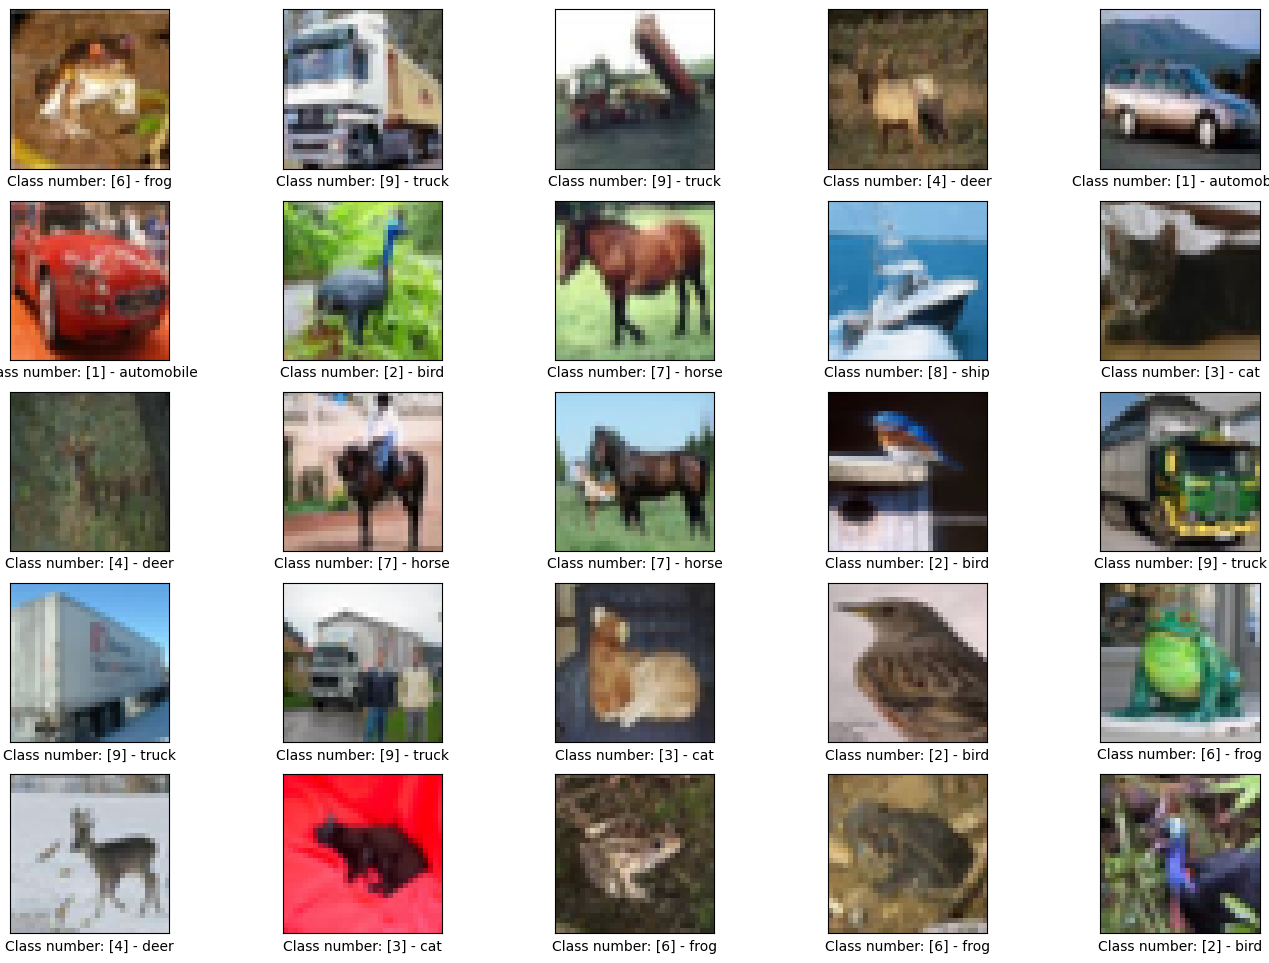

In [ ]:
# display the first 25 images from traing set
plt.figure(figsize=(17,12))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i]) # printing binary/black and white image
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
  plt.xlabel("Class number: %s - %s" % (Y_train[i], class_names[Y_train[i][0]])) # Assigning name to each image
plt.show()

**Findings:**
- A plot of the first 25 images in the dataset is also created. It is clear that the images are indeed very small compared to modern photographs; it can be challenging to see what exactly is represented in some of the images given the extremely low resolution.
- This low resolution is likely the cause of the limited performance that top-of-the-line algorithms are able to achieve on the dataset.

#PART 3: Data Preprocessing

In [ ]:
#Declare Global Variable
NEW_WIDTH = 32  
NEW_HEIGHT = 32
NUM_CLASSES=10
INPUT_SHAPE = (32, 32, 3)
BATCH_SIZE = 32 
EPOCHS = 30

##3.1 Split train set to 80% for training and 20% validation set

Using cross-validation to ensuring a balanced distribution of labels in train set and validation set after splitting

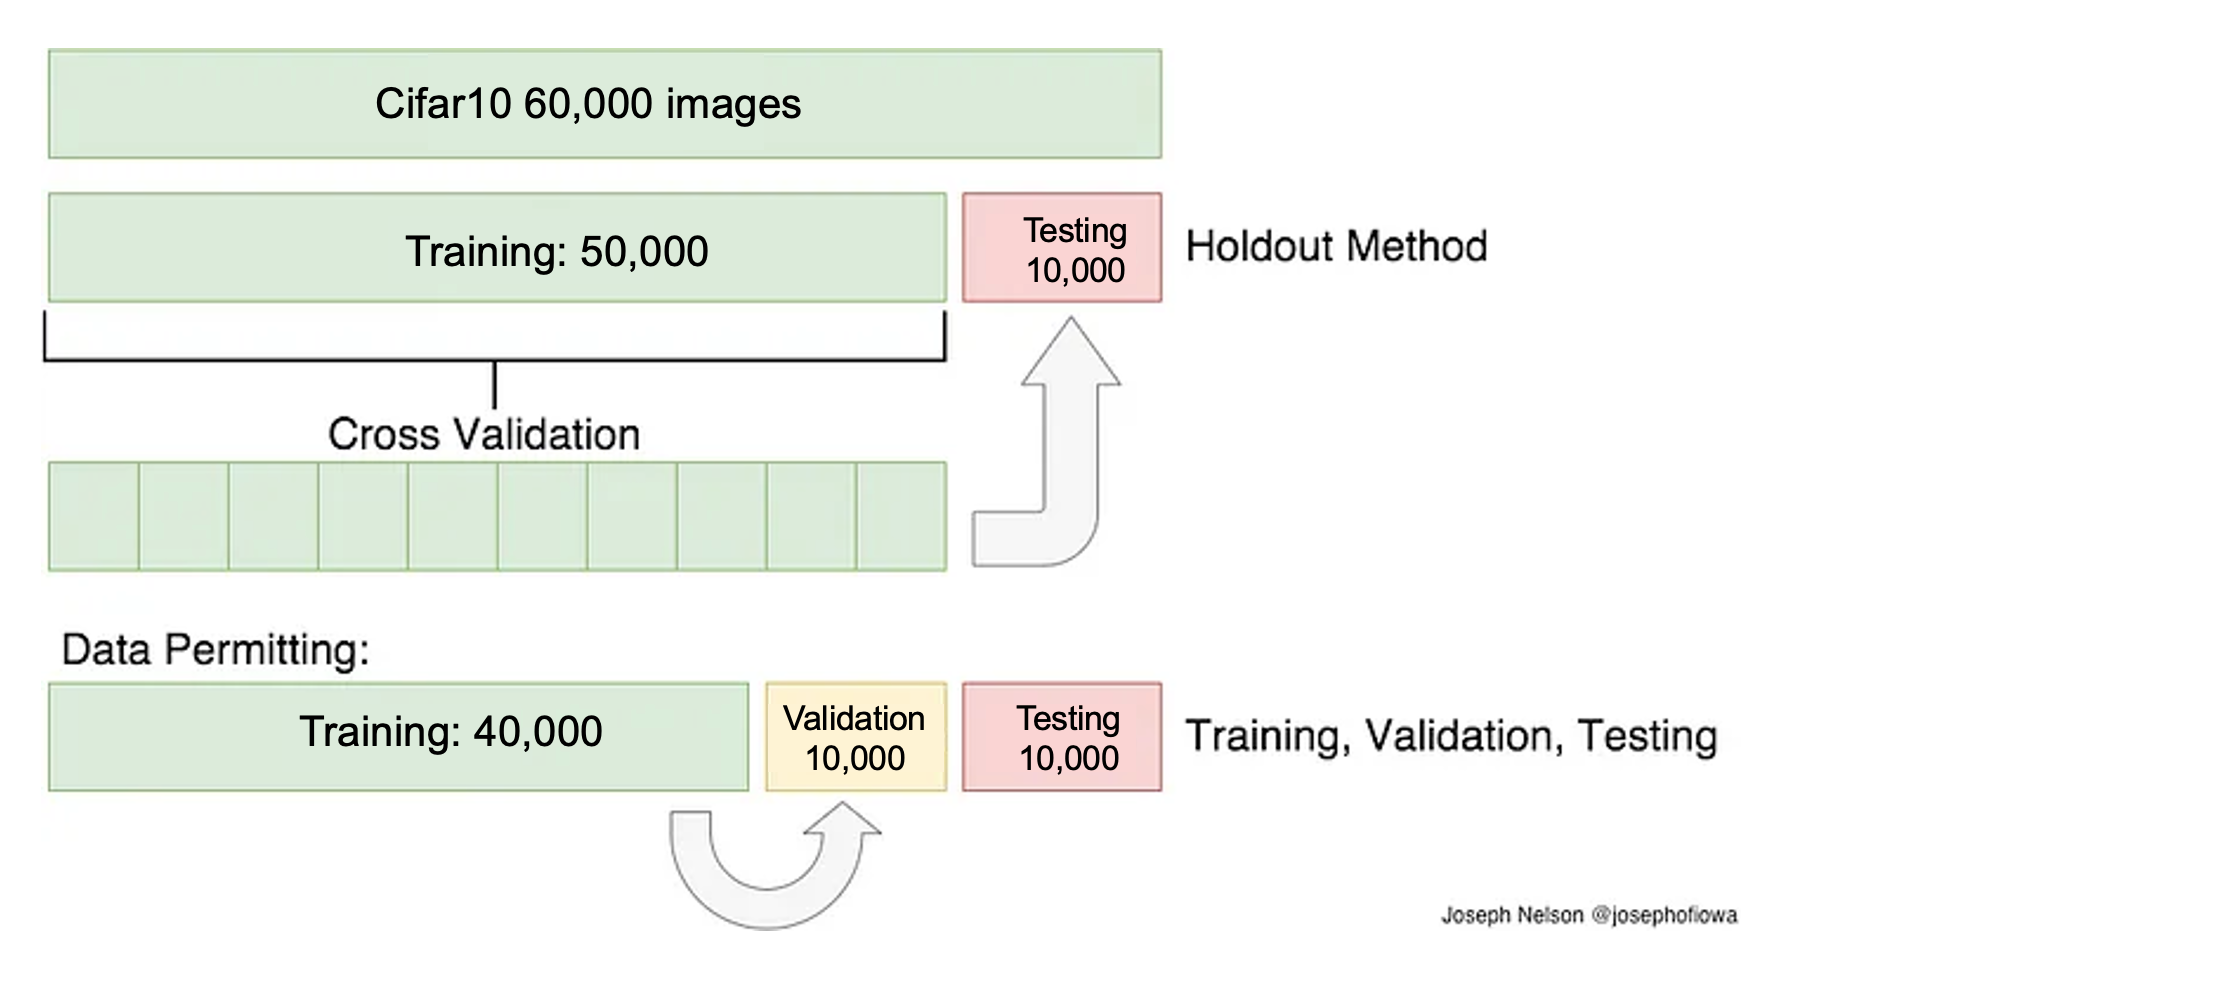

In [ ]:
# Perform train-test split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, train_size=0.8, stratify=Y_train)

TRAIN SET AFTER SPLITTING
Total number of samples: 40000
Number of labels: 10
Number of samples for each label:
- airplane: 4000 samples
- automobile: 4000 samples
- bird: 4000 samples
- cat: 4000 samples
- deer: 4000 samples
- dog: 4000 samples
- frog: 4000 samples
- horse: 4000 samples
- ship: 4000 samples
- truck: 4000 samples
--------



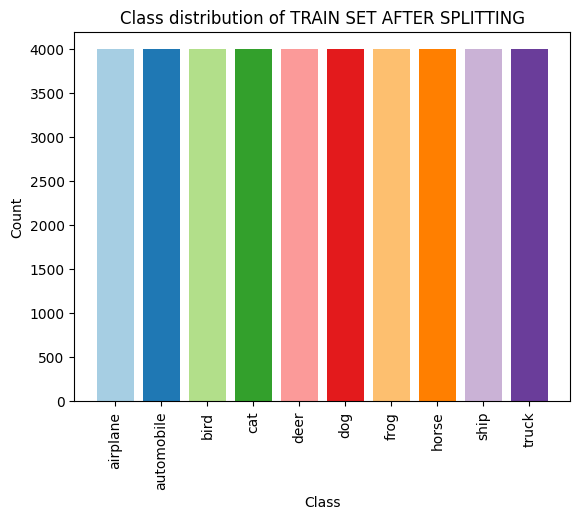

In [ ]:
# Count the number of labels and data samples in the train set
train_labels = len(set(y_train.flatten()))
train_samples = len(x_train)
# Count the number of samples for each label in the train set
train_counts = np.bincount(y_train.flatten(), minlength=len(class_names))
# Print the number of data for each label in the train set
title = 'TRAIN SET AFTER SPLITTING'
print(title)
print(f'Total number of samples: {train_samples}')
print(f'Number of labels: {train_labels}')
print('Number of samples for each label:')
for i, count in enumerate(train_counts):
    print(f'- {class_names[i]}: {count} samples')
print('--------')
print()
plot_class_distribution(class_names, train_counts, title)

VALIDATION SET AFTER SPLITTING
Total number of samples: 10000
Number of labels: 10
Number of samples for each label:
- airplane: 1000 samples
- automobile: 1000 samples
- bird: 1000 samples
- cat: 1000 samples
- deer: 1000 samples
- dog: 1000 samples
- frog: 1000 samples
- horse: 1000 samples
- ship: 1000 samples
- truck: 1000 samples
--------



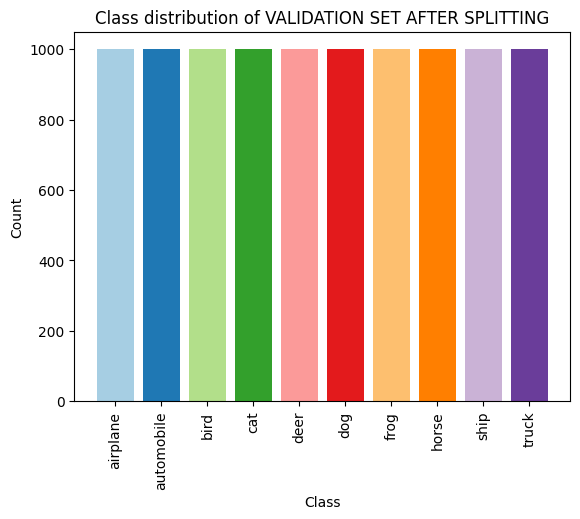

In [ ]:
# Count the number of labels and data samples in the train set
val_labels = len(set(y_val.flatten()))
val_samples = len(x_val)
# Count the number of samples for each label in the train set
val_counts = np.bincount(y_val.flatten(), minlength=len(class_names))
# Print the number of data for each label in the train set
title = 'VALIDATION SET AFTER SPLITTING'
print(title)
print(f'Total number of samples: {val_samples}')
print(f'Number of labels: {val_labels}')
print('Number of samples for each label:')
for i, count in enumerate(val_counts):
    print(f'- {class_names[i]}: {count} samples')
print('--------')
print()
plot_class_distribution(class_names, val_counts, title)

##3.2 Normalize pixel value range in image

- When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.

- As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

In [ ]:
# Normalize the datasets RGB
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Class number: 0 - Class name: airplane
------
Image height: 32
Image width: 32
(32, 32, 3)


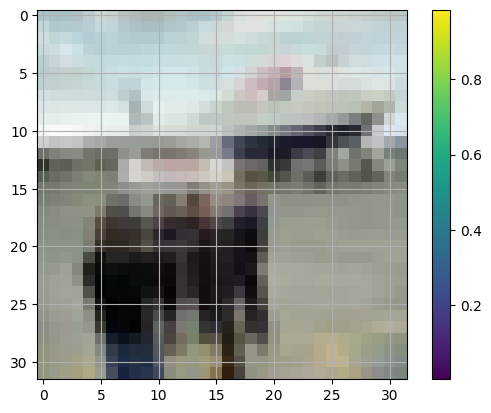

In [ ]:
# inspect the data in the array
index = 8
image = x_train[index]

print("Class number: %s - Class name: %s" % (y_train[index][0], class_names[y_train[index][0]]))
print("------")
# Print the height and width of the image
height, width, _ = image.shape
print(f"Image height: {height}")
print(f"Image width: {width}")
print(image.shape)

plt.imshow(image) 
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()

##3.3 Onehot endcoding

In [ ]:
# Convert the labels to categorical format
# One hot encoding
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_val = to_categorical(y_val, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

In [ ]:
#Label before onehot
print('The label before one hot endcoding is:', Y_train[index])

The label before one hot endcoding is: [8]


In [ ]:
#Label converted after onehot endcoding
print('The label after one hot endcoding is:', y_train[index])

The label after one hot endcoding is: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#PART 4: Model Development

##4.1 Design Baseline Model

A good starting point is the general architectural principles of the VGG models. These are a good starting point because they achieved top performance in the **ILSVRC (ImageNet Large Scale Visual Recognition Competition)** 2014 competition and because the modular structure of the architecture is easy to understand and implement. For more details on the VGG model, see the 2015 paper “Very Deep Convolutional Networks for Large-Scale Image Recognition.” (https://arxiv.org/abs/1409.1556)

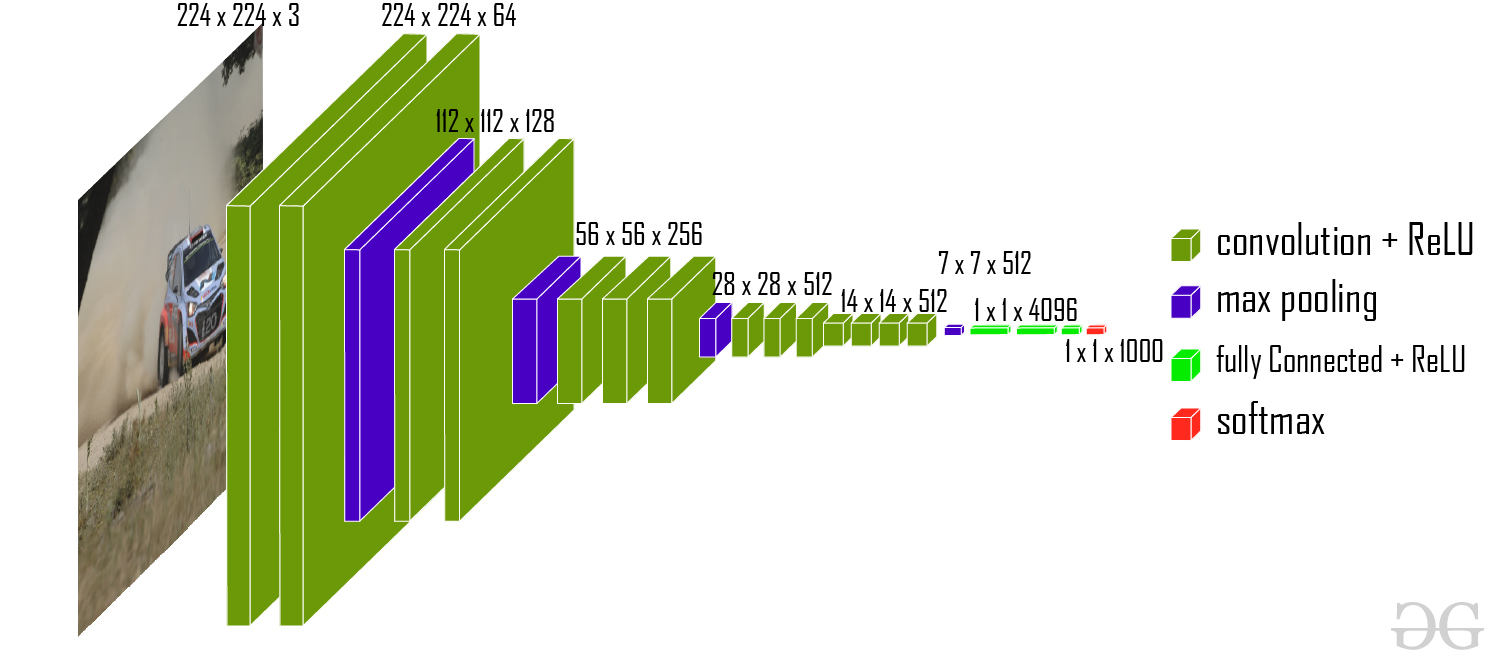

- We start with define_based_model() function for one standard VGG block as below

In [ ]:
# Define the base model
def define_base_model():
    model = Sequential(name='cifar10')
    model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def summarize_diagnostics(history):
    # Create a figure and axes with desired figsize
    fig, axs = pyplot.subplots(1, 2, figsize=(9, 4))
    plt.style.use('ggplot')
    
    # Plot loss
    axs[0].plot(history.history['loss'], color='blue', label='Train')
    axs[0].plot(history.history['val_loss'], color='orange', label='Validation')
    axs[0].set_title('Cross Entropy Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    
    # Plot accuracy
    axs[1].plot(history.history['accuracy'], color='blue', label='Train')
    axs[1].plot(history.history['val_accuracy'], color='orange', label='Validation')
    axs[1].set_title('Classification Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    
    # Adjust spacing between subplots
    fig.tight_layout()
    
    # Show the plot
    pyplot.show()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness(model):
    # fit model
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(
              x_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              verbose=1,
              callbacks=[callback], 
              validation_data=(x_val, y_val),
              shuffle=True)
    # evaluate model
    train_accuracy = round(history.history['accuracy'][-1], 4)
    val_accuracy = round(history.history['val_accuracy'][-1], 4)
    train_loss = round(history.history['loss'][-1], 4)
    val_loss = round(history.history['val_loss'][-1], 4)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    test_loss = round(test_loss, 4)
    test_accuracy = round(test_accuracy, 4)

    # Print loss value
    print("\n-------\nMODEL PERFORMANCE SUMMARY:")
    print("Train Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Test Loss:", test_loss)
    print("-------")
    # Print accuracy score
    print(f"Train Accuracy: {train_accuracy:.2%}")
    print(f"Validation Accuracy: {val_accuracy:.2%}")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    # learning curves
    print("-------")
    summarize_diagnostics(history)
    # Save the trained model
    model.save("trained_base_model.h5")
    return history

Epoch 1/30
1250/1250 [==============================] - 11s 5ms/step - loss: 1.3301 - accuracy: 0.5258 - val_loss: 1.3297 - val_accuracy: 0.5502
Epoch 2/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8849 - accuracy: 0.6910 - val_loss: 1.0027 - val_accuracy: 0.6481
Epoch 3/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6378 - accuracy: 0.7750 - val_loss: 0.9988 - val_accuracy: 0.6735
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4411 - accuracy: 0.8465 - val_loss: 1.2055 - val_accuracy: 0.6433
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2974 - accuracy: 0.8969 - val_loss: 1.5209 - val_accuracy: 0.6146
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1993 - accuracy: 0.9313 - val_loss: 1.6963 - val_accuracy: 0.6395
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1550 - accuracy: 0.9481 - val_loss: 2.0418 - val_accuracy

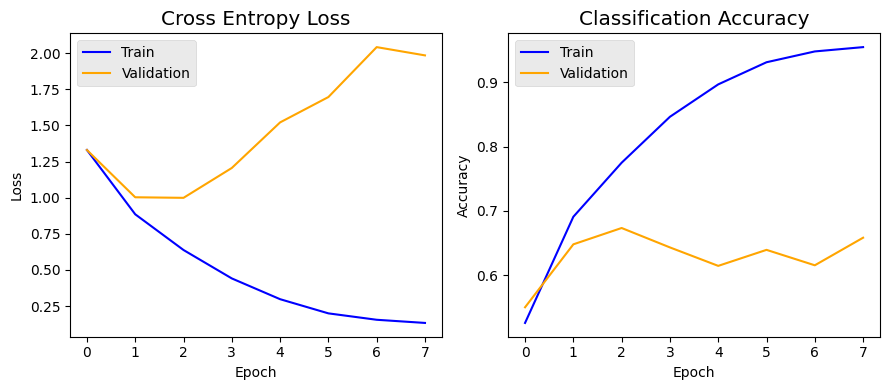

In [ ]:
# define base model
base_model = define_base_model()
# entry point, run the test harness
base_model_ = run_test_harness(base_model)

###Baseline 1: 2 VGG block build on base model

In [ ]:
def define_model_2block():
    model = Sequential(name='cifar10')
    model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(120, activation='relu')) 
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    adam = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/30
1250/1250 [==============================] - 11s 6ms/step - loss: 1.3113 - accuracy: 0.5321 - val_loss: 1.2933 - val_accuracy: 0.5349
Epoch 2/30
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8478 - accuracy: 0.7009 - val_loss: 0.9282 - val_accuracy: 0.6786
Epoch 3/30
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6513 - accuracy: 0.7717 - val_loss: 0.9302 - val_accuracy: 0.6983
Epoch 4/30
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5191 - accuracy: 0.8178 - val_loss: 0.7766 - val_accuracy: 0.7429
Epoch 5/30
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4051 - accuracy: 0.8570 - val_loss: 0.8339 - val_accuracy: 0.7389
Epoch 6/30
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3146 - accuracy: 0.8881 - val_loss: 0.7971 - val_accuracy: 0.7610
Epoch 7/30
1250/1250 [==============================] - 7s 5ms/step - loss: 0.2440 - accuracy: 0.9136 - val_loss: 0.9064 - val_accuracy

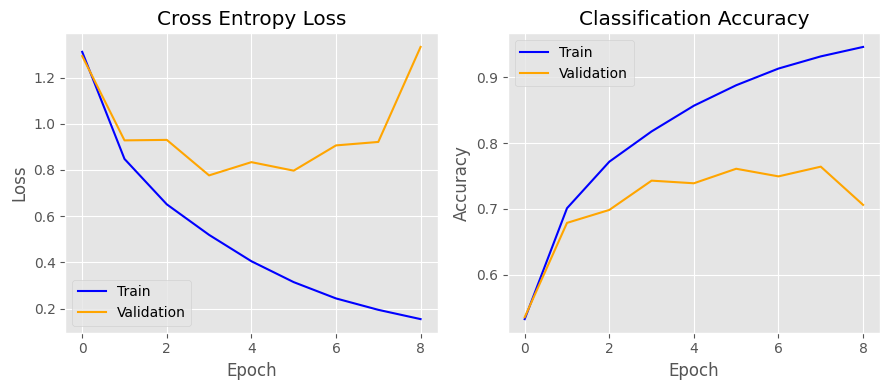

In [ ]:
# define base model
model_2block = define_model_2block()
# entry point, run the test harness
model_2block_ = run_test_harness(model_2block)

###Baseline 2: 3 VGG block build from base model

In [ ]:
def define_model_3block():
    model = Sequential(name='cifar10')
    model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    adam = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# define base model
model_3block = define_model_3block()

Epoch 1/30
1250/1250 [==============================] - 14s 7ms/step - loss: 1.3354 - accuracy: 0.5212 - val_loss: 1.0053 - val_accuracy: 0.6458
Epoch 2/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8702 - accuracy: 0.6932 - val_loss: 1.4961 - val_accuracy: 0.5357
Epoch 3/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6962 - accuracy: 0.7568 - val_loss: 0.8368 - val_accuracy: 0.7099
Epoch 4/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.5751 - accuracy: 0.8003 - val_loss: 0.6756 - val_accuracy: 0.7723
Epoch 5/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.4773 - accuracy: 0.8344 - val_loss: 0.6877 - val_accuracy: 0.7730
Epoch 6/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.4040 - accuracy: 0.8589 - val_loss: 0.6747 - val_accuracy: 0.7858
Epoch 7/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3331 - accuracy: 0.8837 - val_loss: 0.8795 - val_accuracy

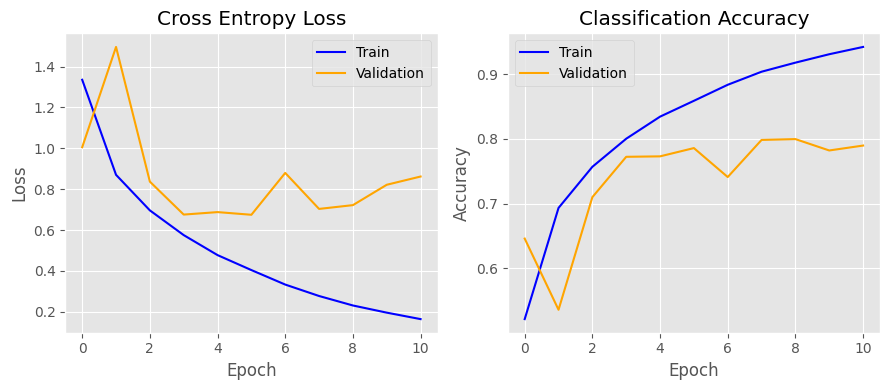

In [ ]:
# entry point, run the test harness
model_3block_ = run_test_harness(model_3block)

**Conclusion:**

We have explored 03 different models with a LeNet-based architecture. The results on validation set can be summarized below, although we must assume some variance in these results given the stochastic nature of the algorithm:

| <p>Metric</p>| <p>baseline model| <p>2 block VGG |<p>3 block VGG |
| -------------- | -------------- | -------------- |-------------- |
| <p>Accuracy Score | <p>65.84% | <p>70.60% | <p>78.90% |
| <p>Number of epochs were able to train| <p>8/30 | <p>9/30 | <p>11/30|

In all cases, the model was able to learn the training dataset, showing an improvement on the training dataset that at least continued to 11 epochs, and perhaps more.


- We decided to establish a baseline model, the LeNet architecture with 03 blocks, we can investigate modifications to the model and the training algorithm that seek to improve performance.

- We will look at two main areas first to address the severe overfitting observed, namely **regularization** and **data augmentation**.

##4.2 Model Tuning

###4.2.1 Base model + Drop out (Dropout Regularization)

- Dropout is a simple technique that will randomly drop nodes out of the network. It has a regularizing effect as the remaining nodes must adapt to pick-up the slack of the removed nodes.
- Dropout can be added to the model by adding new Dropout layers, where the amount of nodes removed is specified as a parameter. In this case, I will add Dropout layers after each max pooling layer and after the fully connected layer, and use a fixed dropout rate of 20% (e.g. retain 80% of the nodes).

In [ ]:
def define_model_3block_tuning_v1():
    model = Sequential(name='cifar10')
    model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    adam = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# define base model
model_3block_tuning_v1 = define_model_3block_tuning_v1()

Epoch 1/30
1250/1250 [==============================] - 18s 8ms/step - loss: 1.4929 - accuracy: 0.4629 - val_loss: 1.1850 - val_accuracy: 0.5762
Epoch 2/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0485 - accuracy: 0.6356 - val_loss: 0.9534 - val_accuracy: 0.6651
Epoch 3/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8703 - accuracy: 0.6999 - val_loss: 0.9337 - val_accuracy: 0.6735
Epoch 4/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7648 - accuracy: 0.7362 - val_loss: 0.7285 - val_accuracy: 0.7491
Epoch 5/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6930 - accuracy: 0.7649 - val_loss: 0.6832 - val_accuracy: 0.7671
Epoch 6/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6282 - accuracy: 0.7862 - val_loss: 0.6959 - val_accuracy: 0.7696
Epoch 7/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5827 - accuracy: 0.8004 - val_loss: 0.6642 - val_accuracy

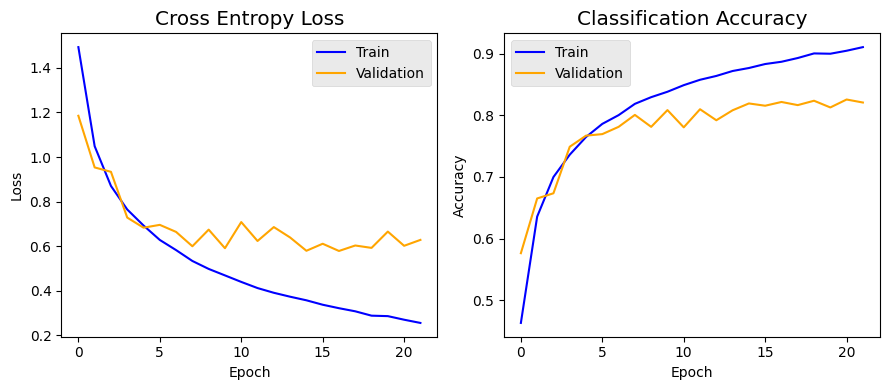

In [ ]:
# entry point, run the test harness
model_3block_tuning_v1_ = run_test_harness(model_3block_tuning_v1)

###4.2.2 Base model + Data Augmentation

- Data augmentation involves making copies of the examples in the training dataset with small random modifications.
This has a regularizing effect as it both expands the training dataset and allows the model to learn the same general features, although in a more generalized manner.
- I will investigate the effect of simple augmentation on the baseline image, specifically horizontal flips and 10% shifts in the height and width of the image.

This can be implemented in Keras using the `ImageDataGenerator` class (https://keras.io/api/data_loading/image/)

In [ ]:
# Create the data generator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    # rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

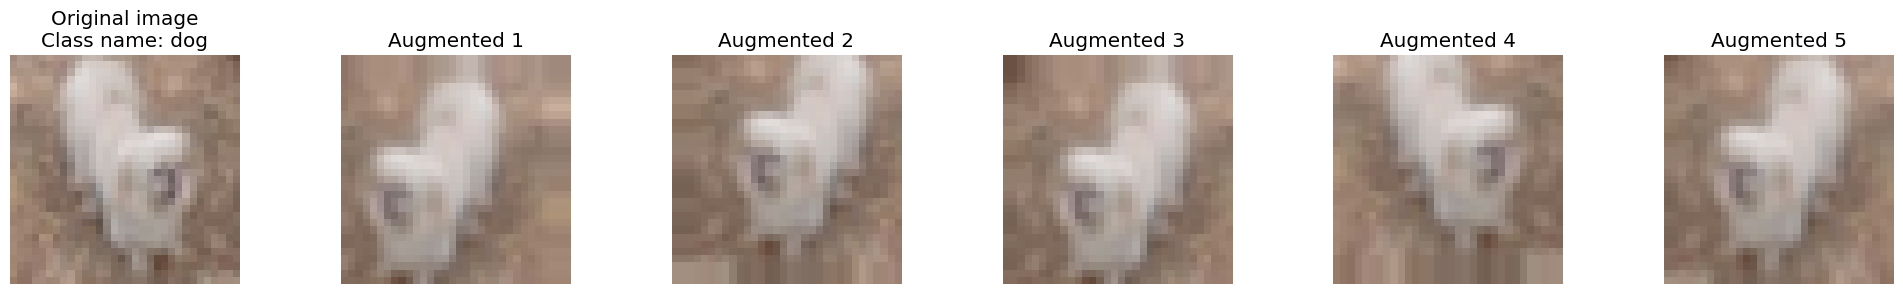

In [ ]:
# Generate augmented images
gen = datagen.flow(x_train[2:3], batch_size=1)
# Set the figure size
plt.figure(figsize=(20, 3))

# Display the original image
plt.subplot(1, 6, 1)
plt.axis("off")
plt.imshow(x_train[2])
plt.title(f"Original image\nClass name: {class_names[np.argmax(y_train[2])]}")

# Display the augmented images
for i in range(2, 7):
    plt.subplot(1, 6, i)
    plt.axis("off")
    augmented_img = gen.next().squeeze()
    plt.imshow(augmented_img)
    plt.title(f"Augmented {i-1}")

# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
def run_test_harness_v1(model):
    # create data generator
    datagen = ImageDataGenerator(
                      featurewise_center=False,
                      samplewise_center=False,
                      featurewise_std_normalization=False,
                      samplewise_std_normalization=False,
                      zca_whitening=False,
                      # rotation_range=50,
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      horizontal_flip=True,
                      vertical_flip=False
                  )
    # prepare iterator
    it_train = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)
    # fit model
    steps = int(x_train.shape[0] / 64)
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(
              it_train,
              steps_per_epoch=steps,
              epochs=EPOCHS,
              verbose=1,
              callbacks=[callback], 
              validation_data=(x_val, y_val),
              shuffle=True)
    # evaluate model
    train_accuracy = round(history.history['accuracy'][-1], 4)
    val_accuracy = round(history.history['val_accuracy'][-1], 4)
    train_loss = round(history.history['loss'][-1], 4)
    val_loss = round(history.history['val_loss'][-1], 4)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    test_loss = round(test_loss, 4)
    test_accuracy = round(test_accuracy, 4)

    # Print loss value
    print("\n-------\nMODEL PERFORMANCE SUMMARY:")
    print("Train Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Test Loss:", test_loss)
    print("-------")
    # Print accuracy score
    print(f"Train Accuracy: {train_accuracy:.2%}")
    print(f"Validation Accuracy: {val_accuracy:.2%}")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    # learning curves
    print("-------")
    summarize_diagnostics(history)
    # Save the trained model
    model.save("trained_base_model.h5")
    return history

Epoch 1/30
625/625 [==============================] - 26s 19ms/step - loss: 1.6421 - accuracy: 0.3954 - val_loss: 1.3813 - val_accuracy: 0.5088
Epoch 2/30
625/625 [==============================] - 11s 18ms/step - loss: 1.3098 - accuracy: 0.5290 - val_loss: 1.1271 - val_accuracy: 0.6044
Epoch 3/30
625/625 [==============================] - 11s 18ms/step - loss: 1.1062 - accuracy: 0.6056 - val_loss: 1.0279 - val_accuracy: 0.6392
Epoch 4/30
625/625 [==============================] - 11s 17ms/step - loss: 0.9894 - accuracy: 0.6510 - val_loss: 0.8460 - val_accuracy: 0.7044
Epoch 5/30
625/625 [==============================] - 11s 17ms/step - loss: 0.9020 - accuracy: 0.6794 - val_loss: 0.8367 - val_accuracy: 0.7103
Epoch 6/30
625/625 [==============================] - 11s 17ms/step - loss: 0.8372 - accuracy: 0.7042 - val_loss: 1.2862 - val_accuracy: 0.5744
Epoch 7/30
625/625 [==============================] - 11s 18ms/step - loss: 0.7809 - accuracy: 0.7331 - val_loss: 0.7822 - val_accuracy:

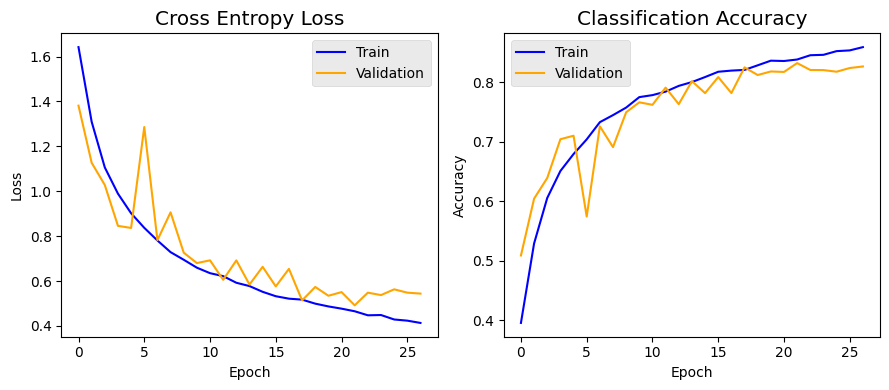

In [ ]:
# define base model
model_3block = define_model_3block()
# entry point, run the test harness
model_3block_ = run_test_harness_v1(model_3block)

###4.2.3 Base model + Dropout + Data Augmentation (Final Model for tuning)

- In the previous section, we discovered that both dropout and data augmentation resulted in a significant improvement in model performance. We can experiment with combining both of these changes to the model to see if a further improvement can be achieved

Epoch 1/30
625/625 [==============================] - 17s 18ms/step - loss: 1.7355 - accuracy: 0.3653 - val_loss: 1.5773 - val_accuracy: 0.4415
Epoch 2/30
625/625 [==============================] - 11s 18ms/step - loss: 1.4163 - accuracy: 0.4936 - val_loss: 1.4089 - val_accuracy: 0.5057
Epoch 3/30
625/625 [==============================] - 11s 17ms/step - loss: 1.2662 - accuracy: 0.5507 - val_loss: 1.1237 - val_accuracy: 0.5999
Epoch 4/30
625/625 [==============================] - 11s 17ms/step - loss: 1.1564 - accuracy: 0.5972 - val_loss: 1.0593 - val_accuracy: 0.6336
Epoch 5/30
625/625 [==============================] - 11s 17ms/step - loss: 1.0561 - accuracy: 0.6285 - val_loss: 1.1604 - val_accuracy: 0.6276
Epoch 6/30
625/625 [==============================] - 11s 18ms/step - loss: 1.0039 - accuracy: 0.6543 - val_loss: 0.8208 - val_accuracy: 0.7188
Epoch 7/30
625/625 [==============================] - 11s 17ms/step - loss: 0.9410 - accuracy: 0.6741 - val_loss: 0.8431 - val_accuracy:

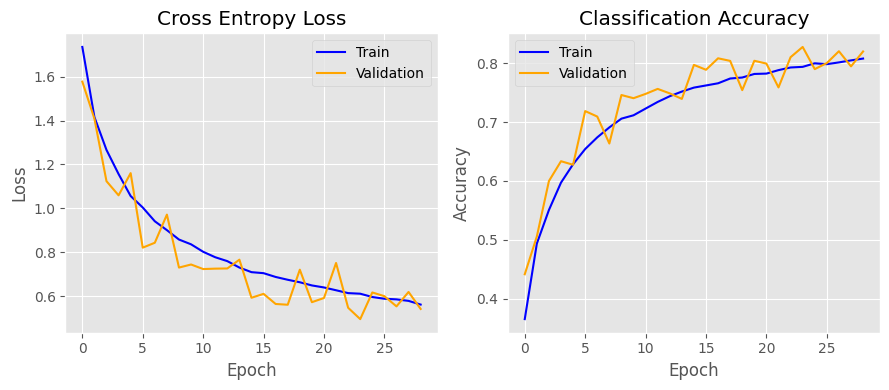

In [ ]:
run_test_harness_v1(model_3block_tuning_v1)

**Conclusions:**
- A summary of the results is provided below:

| <p>Metric</p>| <p>Baseline+Drop out| <p>Baseline+Data Auugmentation |<p>Baseline+Drop out+ Data Augmentation |
| -------------- | -------------- | -------------- |-------------- |
| <p>Accuracy Score | <p>80.09% | <p>80.68% | <p>80.45% |
| <p>Number of epochs were able to train| <p>22/30 | <p>27/30 | <p>29/30|

The results suggest that both dropout and data augmentation are having the desired effect. Now that the model is learning well, we can look for both improvements on what is working, as well as combinations on what is working.

##4.3 Feature Engineer (on Final Model for tuning at section 4.2.3)

###4.3.1 Keras Tuner

####Keras Tuner HyperModel

- To put the whole hyperparameter search space together and perform hyperparameter tuning, Keras Tuners uses `HyperModel` instances.
- We will tune these set of hyperparameter:

```
    - dense_activation :  values= ['relu', 'tanh', 'sigmoid'] 
    - learning_rate: values = [1e-5, 1e-3]
    - loss_function: values=['categorical_crossentropy', 'mean_squared_error']
```


                                                            

In [ ]:
def define_model_3block_tuning_v2(hp):
        model = Sequential(name='VGG_v2')
        model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(AveragePooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(AveragePooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(AveragePooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        model.add(Flatten())
        model.add(Dense(120, activation='relu'))
        model.add(keras.layers.Dense(84, activation=hp.Choice(
                                                            'dense_activation', 
                                                            values=['relu', 'tanh', 'sigmoid'], 
                                                            default='relu')))
        model.add(Dropout(0.2))
        model.add(Dense(10, activation='softmax'))

        adam = keras.optimizers.Adam(learning_rate=hp.Float(
                                                          'learning_rate',
                                                          min_value=1e-5,
                                                          max_value=1e-3,
                                                          sampling='LOG',
                                                          default=1e-3
                                                      ))
        model.compile(optimizer=adam, 
                      loss=hp.Choice(
                                    'loss_function', 
                                     values=['categorical_crossentropy', 'mean_squared_error'],
                                     default='categorical_crossentropy'), 
                      metrics=['accuracy'])
        return model

####Random Search Tuner

In [ ]:
tuner = RandomSearch(
    define_model_3block_tuning_v2,
    objective='val_accuracy',
    max_trials=5,
    directory='random_search',
    project_name='cifar10'
)

####Hyperparameter tuning

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(
    x_train, y_train, 
    epochs=15, 
    batch_size=64,
    callbacks=[callback],
    validation_data=(x_val, y_val))
best_model = tuner.get_best_models(1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print("--------\nBEST HYPERPARAMETERS ARE:")
print(best_hyperparameters.values)
print(best_model.summary())

--------
BEST HYPERPARAMETERS ARE:
{'dense_activation': 'sigmoid', 'learning_rate': 0.00017203964942403657, 'loss_function': 'mean_squared_error'}
Model: "VGG_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 

In [ ]:
# Extract the best hyperparameters values
best_learning_rate = best_hyperparameters.get('learning_rate')
best_activation = best_hyperparameters.get('dense_activation')
best_loss_function = best_hyperparameters.get('loss_function')

print(f''' 
Best Learning rate: {best_learning_rate}
Best Dense Activation: {best_activation}
Best Loss Function: {best_loss_function}
''')

 
Best Learning rate: 0.00017203964942403657
Best Dense Activation: sigmoid
Best Loss Function: mean_squared_error



##4.4 Official model for training

- After tuning, we select these best hyperparameter for training model:

```
    - dense_2 activation :  best_values= ['tanh'] 
    - learning_rate: best_values = [0.00037920913458981074]
    - loss_function: best_values=['categorical_crossentropy']
```

In [ ]:
def define_official_model():
        model = Sequential(name='Official_model')
        model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(AveragePooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(AveragePooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(AveragePooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        model.add(Flatten())
        model.add(Dense(120, activation='relu'))
        model.add(Dense(84, activation=best_activation))
        model.add(Dropout(0.2))
        model.add(Dense(10, activation='softmax'))

        adam = keras.optimizers.Adam(learning_rate=best_learning_rate)
        model.compile(optimizer=adam, loss=best_loss_function, metrics=['accuracy'])
        return model

In [ ]:
def run_test_harness_v2(model):
    # create data generator
    datagen = ImageDataGenerator(
                      featurewise_center=False,
                      samplewise_center=False,
                      featurewise_std_normalization=False,
                      samplewise_std_normalization=False,
                      zca_whitening=False,
                      # rotation_range=50,
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      horizontal_flip=True,
                      vertical_flip=False
                  )
    # prepare iterator
    it_train = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)
    # fit model
    steps = int(x_train.shape[0] / 64)
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(
              it_train,
              steps_per_epoch=steps,
              epochs=50,
              verbose=1,
              callbacks=[callback], 
              validation_data=(x_val, y_val),
              shuffle=True)
    # evaluate model
    train_accuracy = round(history.history['accuracy'][-1], 4)
    val_accuracy = round(history.history['val_accuracy'][-1], 4)
    train_loss = round(history.history['loss'][-1], 4)
    val_loss = round(history.history['val_loss'][-1], 4)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    test_loss = round(test_loss, 4)
    test_accuracy = round(test_accuracy, 4)

    # Print loss value
    print("\n-------\nMODEL PERFORMANCE SUMMARY:")
    print("Train Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Test Loss:", test_loss)
    print("-------")
    # Print accuracy score
    print(f"Train Accuracy: {train_accuracy:.2%}")
    print(f"Validation Accuracy: {val_accuracy:.2%}")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    # learning curves
    print("-------")
    summarize_diagnostics(history)
    # Save the trained model
    model.save("trained_base_model.h5")
    return history

In [ ]:
# define model
official_model = define_official_model()

In [ ]:
# model summary
official_model.summary()

Model: "Official_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 average_pooling2d_3 (Averag  (None, 15, 15, 32)       0         
 ePooling2D)                                                     
                                                    

Epoch 1/50
625/625 [==============================] - 16s 18ms/step - loss: 0.0780 - accuracy: 0.3412 - val_loss: 0.0695 - val_accuracy: 0.4399
Epoch 2/50
625/625 [==============================] - 11s 18ms/step - loss: 0.0662 - accuracy: 0.4764 - val_loss: 0.0594 - val_accuracy: 0.5382
Epoch 3/50
625/625 [==============================] - 11s 17ms/step - loss: 0.0603 - accuracy: 0.5367 - val_loss: 0.0534 - val_accuracy: 0.5982
Epoch 4/50
625/625 [==============================] - 11s 18ms/step - loss: 0.0569 - accuracy: 0.5657 - val_loss: 0.0599 - val_accuracy: 0.5601
Epoch 5/50
625/625 [==============================] - 11s 18ms/step - loss: 0.0538 - accuracy: 0.5966 - val_loss: 0.0529 - val_accuracy: 0.6014
Epoch 6/50
625/625 [==============================] - 11s 18ms/step - loss: 0.0509 - accuracy: 0.6197 - val_loss: 0.0472 - val_accuracy: 0.6463
Epoch 7/50
625/625 [==============================] - 11s 18ms/step - loss: 0.0496 - accuracy: 0.6312 - val_loss: 0.0443 - val_accuracy:

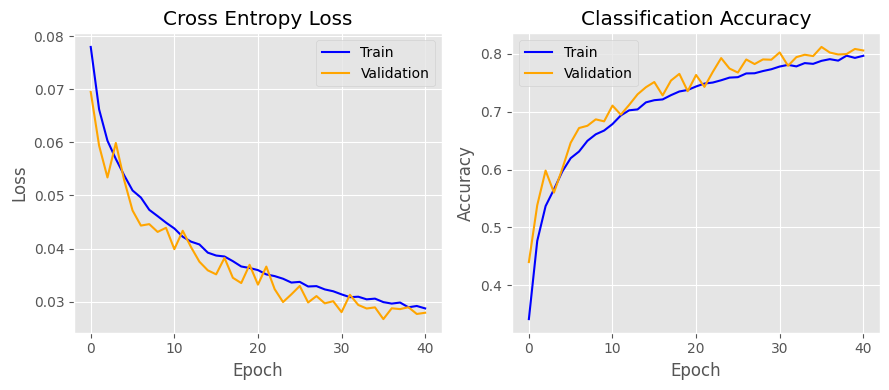

In [ ]:
# train model on train set and see the result
official_model_ = run_test_harness_v2(official_model)

# Part 5: Performance Assessment

In [ ]:
#official_model
from sklearn.metrics import (confusion_matrix,
                             classification_report)

### 5.1 Plotting of Training and Validation Loss

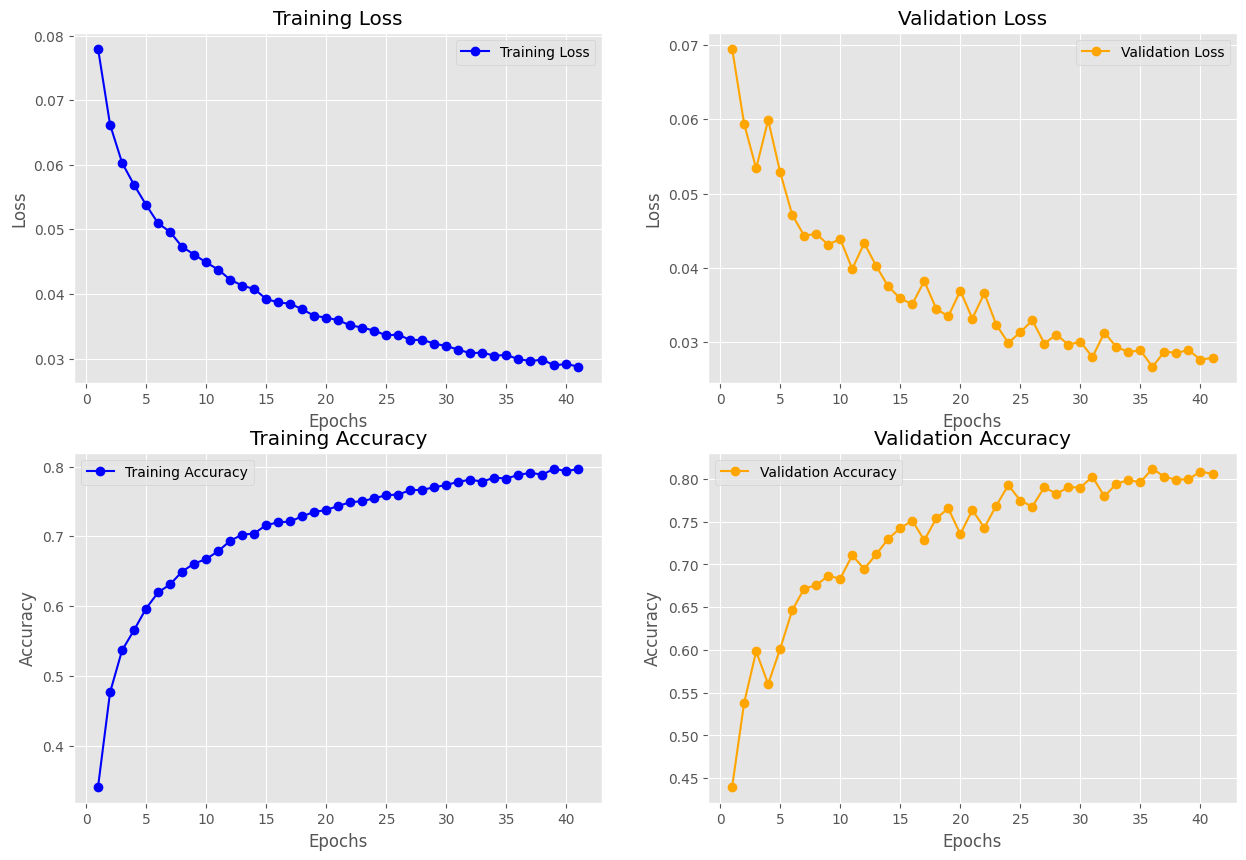

In [ ]:
# plotting the trend of training error during epochs
training_loss = official_model_.history['loss']
# plotting the trend of validation error during epochs
val_loss = official_model_.history['val_loss']

# plotting the trend of training accuracy during epochs
training_acc = official_model_.history['accuracy']
# plotting the trend of validation accuracy during epochs
val_acc = official_model_.history['val_accuracy']

fig = plt.figure(figsize = (15,10))
fig.add_subplot(221)
# Plotting the training loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss', marker='o' )
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

fig.add_subplot(222)
epochs = range(1, len(val_loss) + 1)
plt.plot(epochs, val_loss, 'orange', label='Validation Loss', marker='o' )
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

fig.add_subplot(223)
# Plotting the training loss
epochs = range(1, len(training_acc) + 1)
plt.plot(epochs, training_acc, 'b', label='Training Accuracy', marker='o' )
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig.add_subplot(224)
epochs = range(1, len(val_acc) + 1)
plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy', marker='o' )
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The training loss graph on the left decreases gradually as the number of epochs increases, indicating that the model's performance is improving. This gradual decrease in loss value is a result of the model optimising its learning based on the larger training set, resulting in improved performance.

The validation loss graph on the right, however, appears less smooth. This is due to the fact that the validation dataset only contains 10,000 images, resulting in a smaller evaluation sample size. The limited number of validation samples may introduce greater variability in the model's performance representation, making validation loss values less stable than training loss values.

Regarding the accuracy metric, a test loss value closer to zero indicates that the model performs adequately on the test set. In terms of accuracy, however, a greater value is prefered, as it indicates a greater proportion of correctly classified instances.

The model has achieved a test loss score of 0.0291 and a test accuracy of 79.82% in this instance.

reference: https://stats.stackexchange.com/questions/462204/validation-loss-decreasing-faster-than-training-loss

## 5.2 Model Accuracy

In [ ]:
# Get the predicted labels for the test set
y_pred = official_model.predict(x_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report with class names
report = classification_report(y_true_classes, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

313/313 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.87      0.76      0.81      1000
  automobile       0.86      0.93      0.89      1000
        bird       0.74      0.71      0.73      1000
         cat       0.73      0.65      0.68      1000
        deer       0.78      0.76      0.77      1000
         dog       0.84      0.62      0.71      1000
        frog       0.64      0.96      0.77      1000
       horse       0.82      0.88      0.85      1000
        ship       0.89      0.89      0.89      1000
       truck       0.89      0.85      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



### Classification report analysis

<b>Precision:</b>  
Precision measures the model's ability to accurately identify positive examples for each class. The model achieved high precision scores, with the classes "ship" and "truck" having the highest precision at 89%. This means that the model is correct 89% of the time when predicting an image to be an automobile. Nevertheless, the "frog" class has a lower precision score of 64%, indicating that the model has a higher rate of misclassifying cat images as belonging to other classes.

<b>Recall:</b>  
Recall measures the model's capacity to correctly identify all instances of each class. The "frog" class has the highest recall score, at 96%, indicating that the model correctly recognises the majority of frog images as it is. In contrast, the "dog" class has a lower recall score of 62%, indicating that the model has trouble correctly identifying cat images as cats, leading to a greater number of false negatives.

<b>F1-score</b>  
The F1-score is a balanced measure of a model's performance, taking both precision and recall into account. The lowest F1-score for the "cat" class is 68%, indicating that the model trades precision for recall when predicting images of cats. This means that the model may misclassify some cat images and miss some genuine cat images.

<b>Accuracy</b>   
Overall, the model achieved an accuracy of 0.80, indicating that it correctly predicts images with an accuracy rate of <b>80%</b>. The precision rating reflects the model's performance across all classes.

## 5.3 Confusion matrix and Class Accuracy

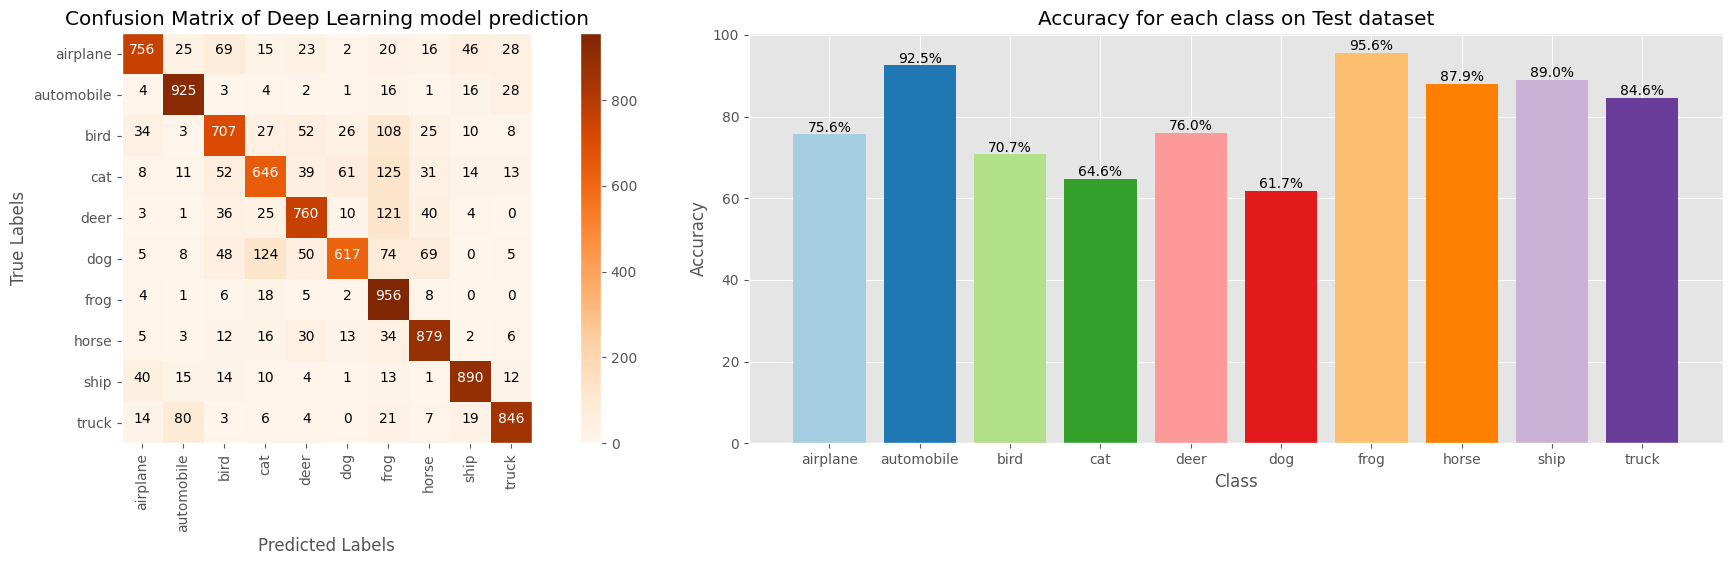

In [ ]:
fig = plt.figure(figsize = (20,10))
# get class labels
y_true_classes = np.argmax(y_test, axis=1)

# Create the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, predicted_labels)

fig.add_subplot(221)
# Plot the confusion matrix
plt.grid(False)
plt.imshow(confusion_mtx, cmap='Oranges')
plt.title('Confusion Matrix of Deep Learning model prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set the tick labels for the x-axis and y-axis
plt.xticks(np.arange(10), class_names, rotation=90)
plt.yticks(np.arange(10), class_names)

plt.colorbar()

# Add labels to each cell
thresh = confusion_mtx.max() / 2.0
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(confusion_mtx[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mtx[i, j] > thresh else "black")

fig.add_subplot(222)
# Prepare to count predictions for each class
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']
correct_pred = {classname: 0 for classname in class_names}
total_pred = {classname: 0 for classname in class_names}

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    if np.array_equal(true_label, np.eye(10)[predicted_label]):
        correct_pred[class_names[np.argmax(true_label)]] += 1
    total_pred[class_names[np.argmax(true_label)]] += 1

# Calculate accuracy for each class
class_accuracy = {}
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    class_accuracy[classname] = accuracy

# Plot the accuracy for each class
plt.bar(class_accuracy.keys(), class_accuracy.values(), color=colors)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy for each class on Test dataset')

# Add annotations on each bar
for x, y in zip(class_accuracy.keys(), class_accuracy.values()):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The confusion matrix on the left reveals that the highest number of mispredictions occurred in the "cat" class, with 125 cat images being incorrectly predicted as frog. This suggests that the model struggles to differentiate between cats and frogs. On the other hand, the bar chart on the right illustrates that only 61.7% of dog images were correctly predicted, indicating a relatively lower accuracy for this class.

In contrast, the "frog" class demonstrates the highest level of accuracy, with 95.6% of frog images being correctly predicted by the model. This indicates that the model performs well in identifying frog images.

## 5.4 Model Prediction observation

### 5.4.1 Samples of model prediction

In [ ]:
import random

# Define a function to plot the images
def plot_images(images, true_labels, pred_labels):
    num_images = images.shape[0]
    indices = random.sample(range(num_images), 12)  # Randomly select 12 indices

    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.ravel()

    for i, index in enumerate(indices):
        axes[i].imshow(images[index])
        axes[i].axis('off')
        true_label = class_names[np.argmax(true_labels[index])]
        pred_label = class_names[pred_labels[index]]  
        axes[i].set_title("predicted: {} (label: {})".format(pred_label, true_label),
                          color=("green" if pred_label == true_label else "red"))

    plt.suptitle('Sample of Predicted Classes for Test Data')
    plt.tight_layout()
    plt.show()

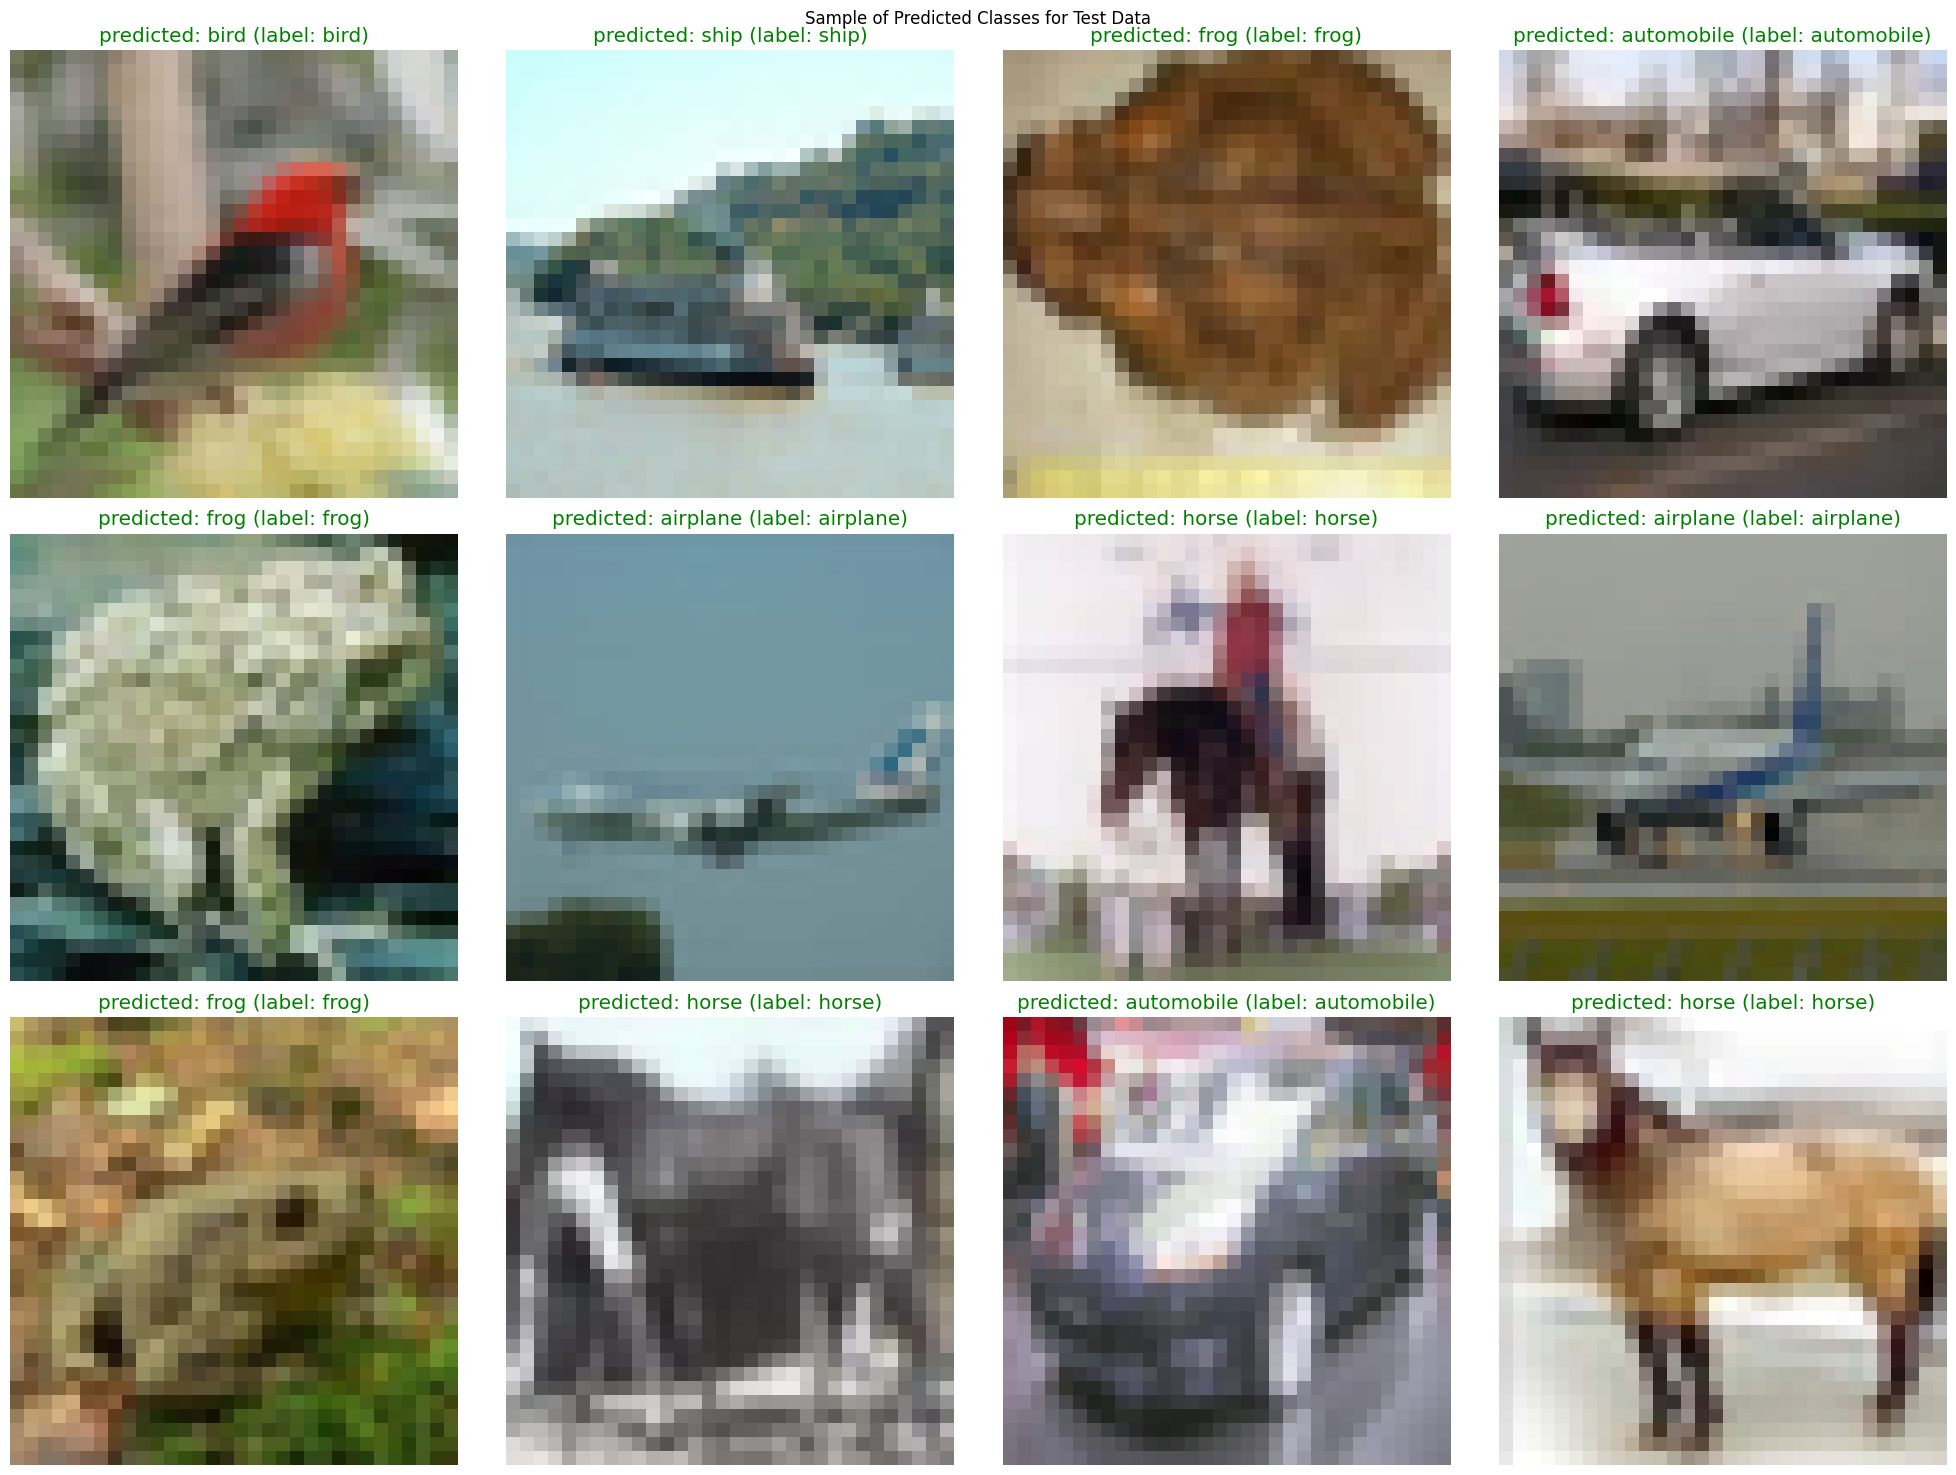

In [ ]:
# Example of the model prediction
# Plot a random subset of images from the validation set
num_images = 12
plot_images(x_test, y_test, predicted_labels)

### 5.4.2 Correct Prediction by class

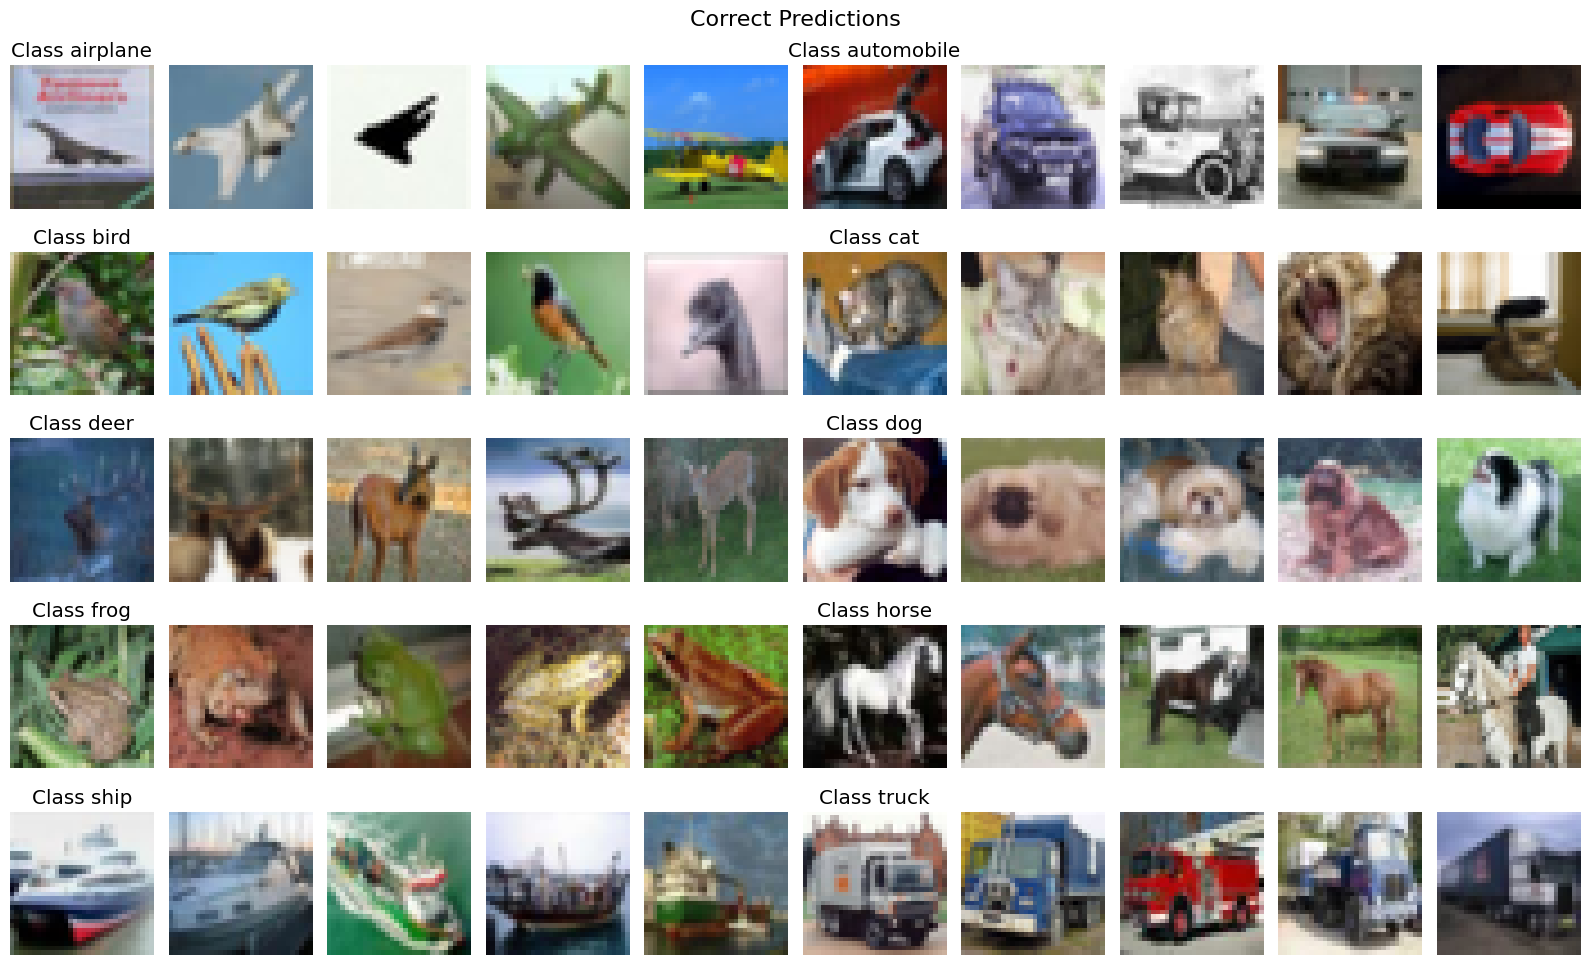

In [ ]:
# Create empty lists to store correct and wrong predictions for each class
correct_predictions = [[] for _ in range(10)]
wrong_predictions = [[] for _ in range(10)]

# Iterate over the predicted labels and true labels
for i in range(len(predicted_labels)):
    true_label = y_true_classes[i]
    predicted_label = predicted_labels[i]
    
    if predicted_label == true_label:  # Correct prediction
        correct_predictions[true_label].append(i)
    else:  # Wrong prediction
        wrong_predictions[true_label].append(i)

# Plot 5 samples of correct predictions for each class
plt.figure(figsize=(16, 10))
plt.suptitle('Correct Predictions', fontsize=16)
plt.subplots_adjust(top=0.92)
for class_index in range(10):
    class_samples = correct_predictions[class_index][:5]  # Limit to 5 samples
    plt.subplot(5, 10, class_index * 5 + 1)
    plt.imshow(x_test[class_samples[0]])
    plt.title(f'Class {class_names[class_index]}')
    plt.axis('off')
    
    for i in range(4):
        index = class_samples[i+1]
        plt.subplot(5, 10, class_index * 5 + i + 2)
        plt.imshow(x_test[index])
        plt.axis('off')

plt.tight_layout()
plt.show()

### 5.4.3 Wrong Prediction by class

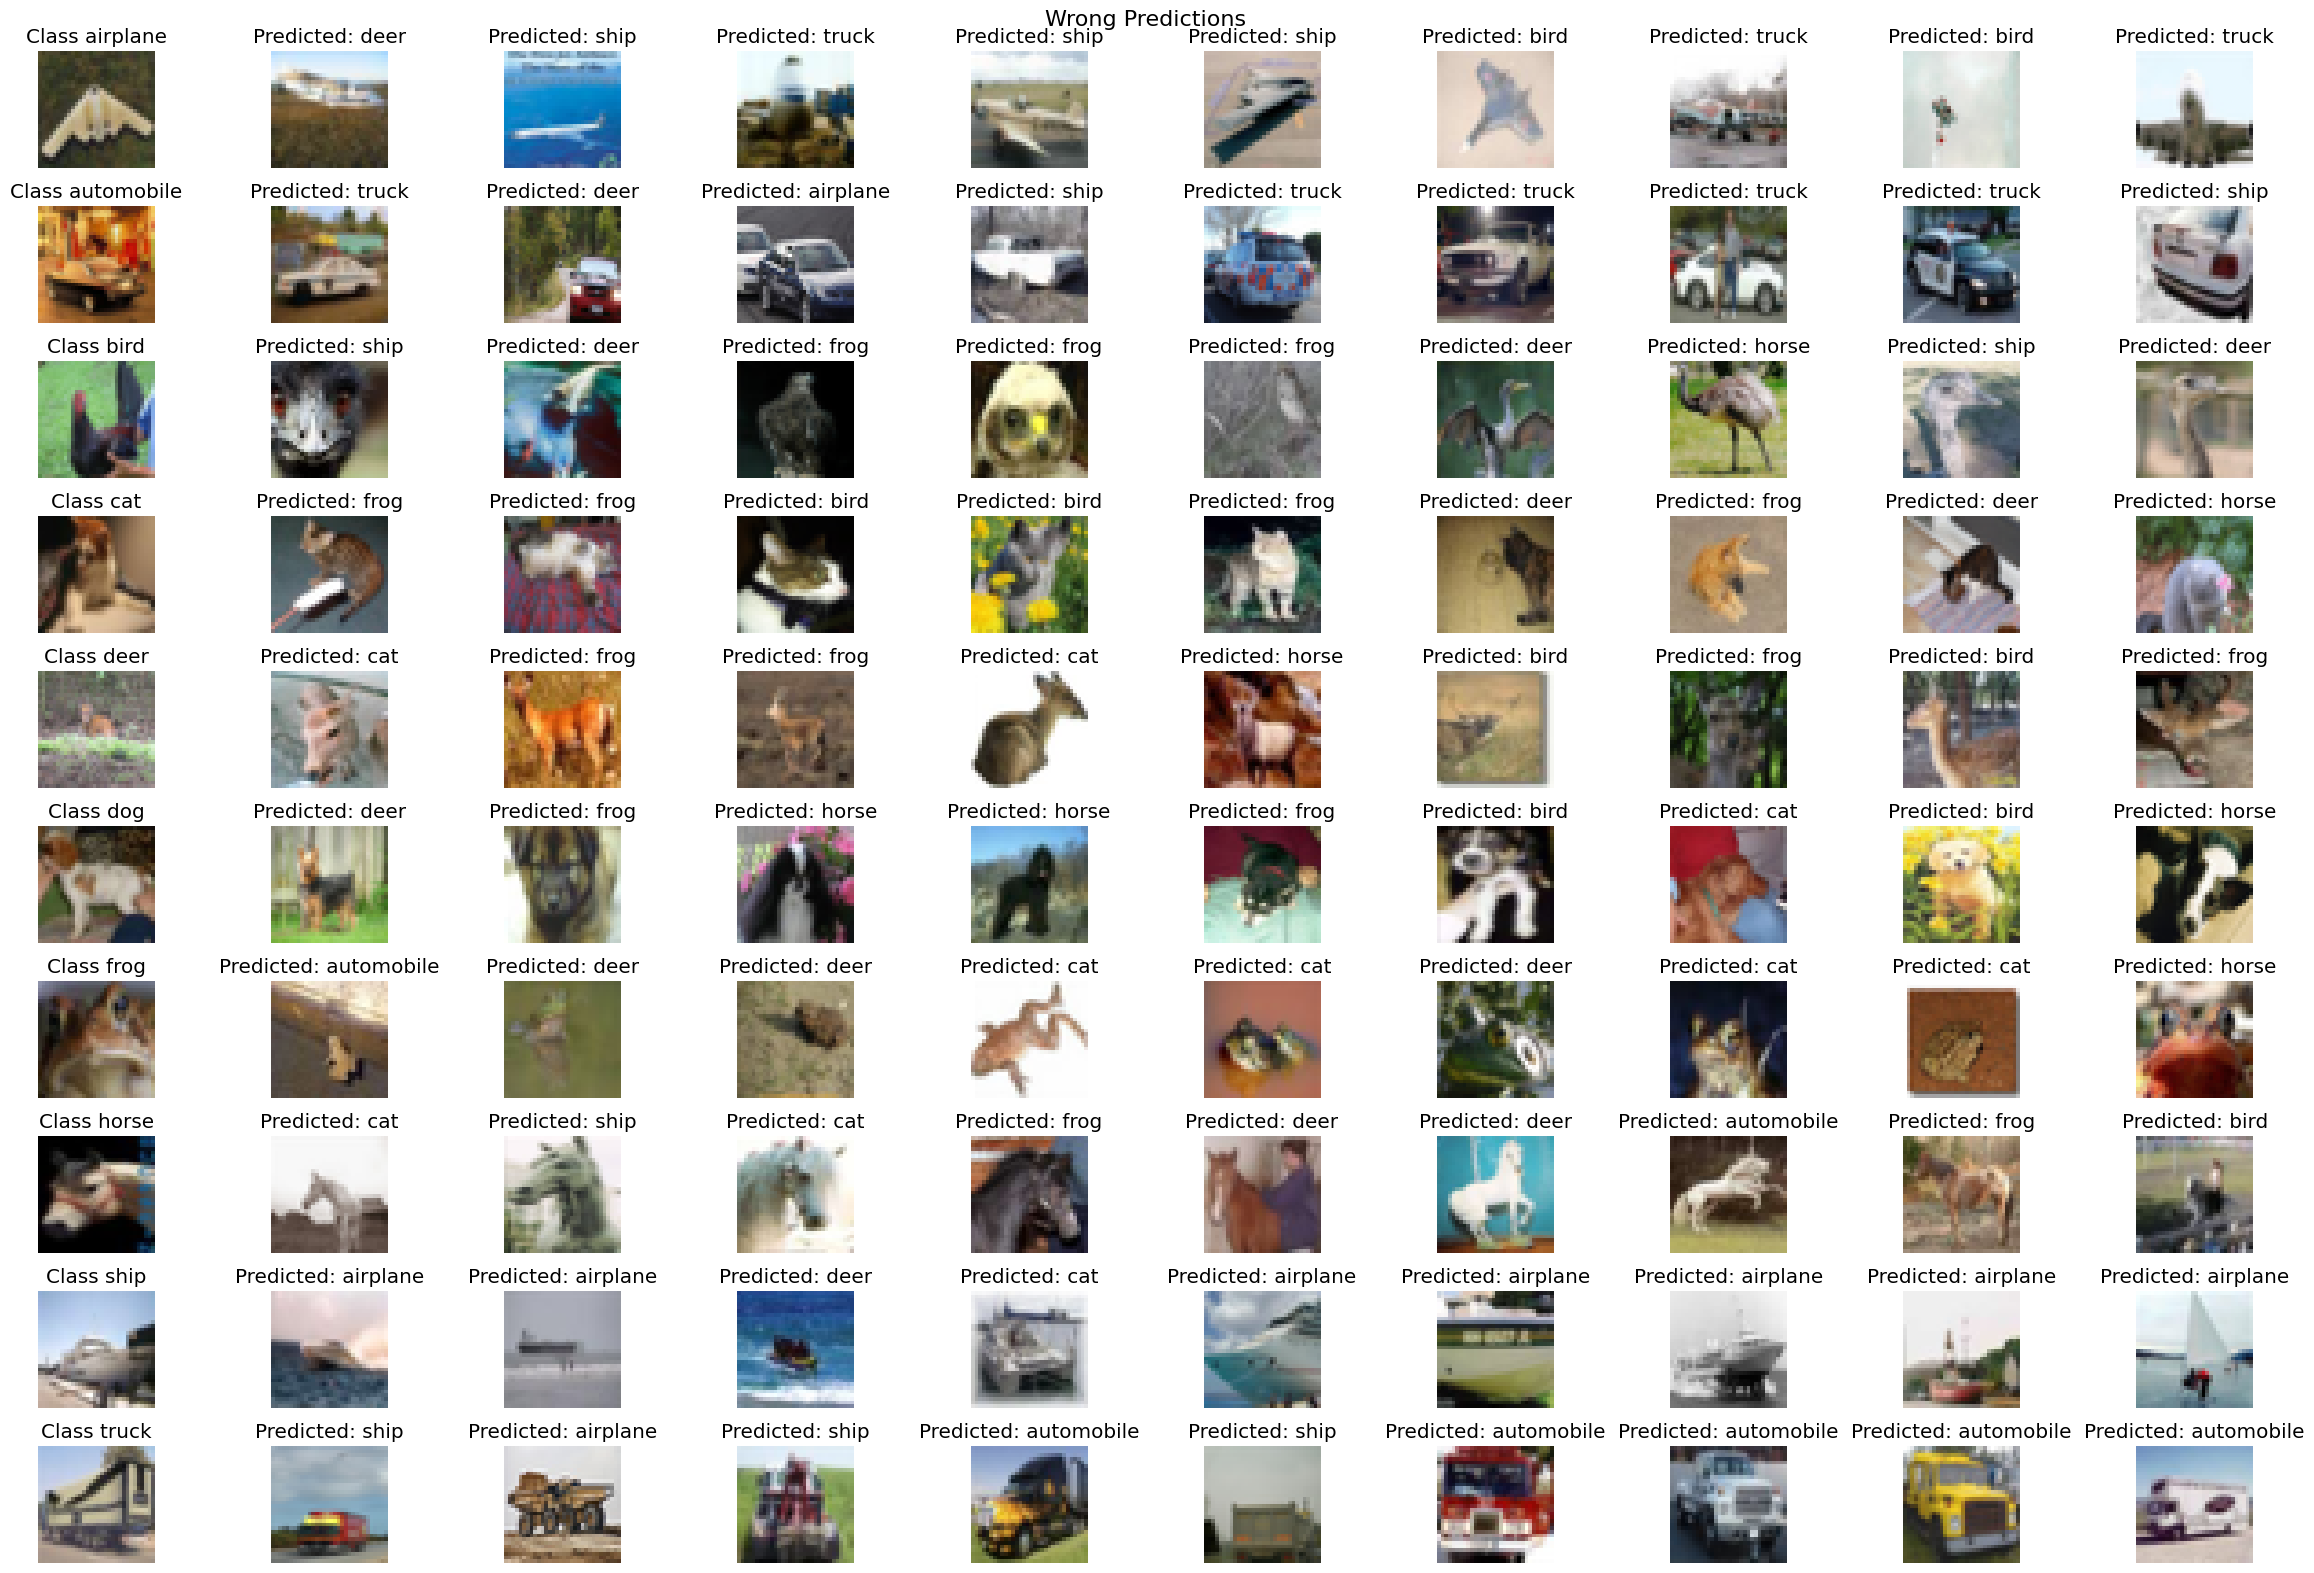

In [ ]:
# Plot 10 samples of wrong predictions for each class
plt.figure(figsize=(24, 16))
plt.suptitle('Wrong Predictions', fontsize=16)
for class_index in range(10):
    class_samples = wrong_predictions[class_index]
    plt.subplot(10, 10, class_index * 10 + 1)
    plt.imshow(x_test[class_samples[0]])
    plt.title(f'Class {class_names[class_index]}')
    plt.axis('off')
    
    for i in range(9):
        index = class_samples[i+1]
        plt.subplot(10, 10, class_index * 10 + i + 2)
        plt.imshow(x_test[index])
        plt.title(f'Predicted: {class_names[predicted_labels[index]]}')
        plt.axis('off')

plt.tight_layout()
plt.show()

### 5.4.4. Observation the highest number of mispredicted class

According to the confusion matrix, it shows that 125 images of cats were mislabeled as frogs. To better understand the cause of this confusion and improve future model development, it would be beneficial to analyze and examine these mislabeled images. By visually inspecting these images, we can identify any similarities or patterns that might have led to the misclassification. This analysis can provide insights into potential areas of improvement, such as refining the model architecture, collecting more diverse training data, or incorporating image preprocessing techniques specific to distinguishing between cats and dogs.

In [ ]:
def plot_confused_images(images, true_labels, pred_labels, class_names, true_class, pred_class, num_images=3):
    num_samples = images.shape[0]
    indices = []
    
    for i in range(num_samples):
        true_label = class_names[np.argmax(true_labels[i])]
        pred_label = class_names[pred_labels[i]]

        if true_label == true_class and pred_label == pred_class:
            indices.append(i)
    
    sample_indices = random.sample(indices, min(num_images, len(indices)))
    
    fig, axes = plt.subplots(1, len(sample_indices), figsize=(15, 10))

    for i, idx in enumerate(sample_indices):
        axes[i].imshow(images[idx])
        axes[i].axis('off')
        axes[i].set_title("True: {}, Predicted: {}".format(class_names[np.argmax(true_labels[idx])], class_names[pred_labels[idx]]),
                          color=("green" if true_labels[idx][np.argmax(true_labels[idx])] == pred_labels[idx] else "red"))

    plt.tight_layout()
    plt.show()

In [ ]:
def find_most_confused_classes(y_true_classes, predicted_labels, class_names):
    confusion_count = {}

    # Iterate over true labels and predicted labels
    for true_label, pred_label in zip(y_true_classes, predicted_labels):
        true_class = class_names[true_label]
        pred_class = class_names[pred_label]

        # Check if the prediction is incorrect
        if true_class != pred_class:
            # Increment the count for the pair of true and predicted classes
            key = (true_class, pred_class)
            if key in confusion_count:
                confusion_count[key] += 1
            else:
                confusion_count[key] = 1

    # Find the pair with the highest count
    most_confused_pair = max(confusion_count, key=confusion_count.get)

    return most_confused_pair

# Get the most confused pair of classes
most_confused_pair = find_most_confused_classes(y_true_classes, predicted_labels, class_names)
true_class, pred_class = most_confused_pair

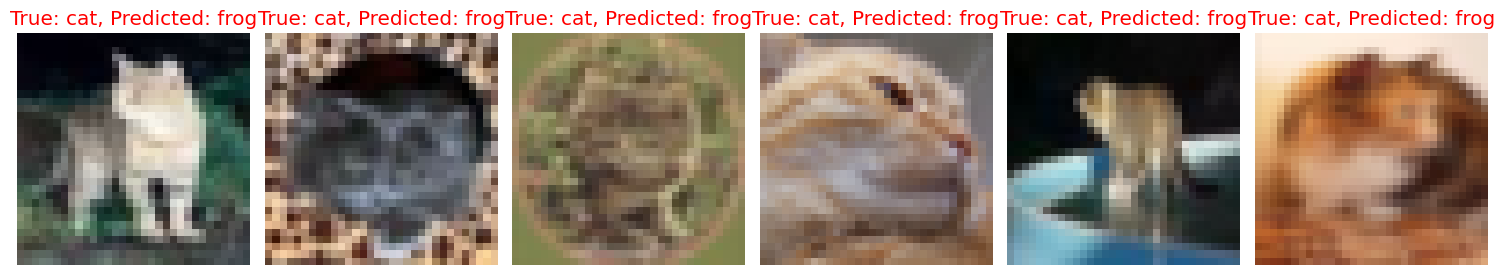

In [ ]:
plot_confused_images(x_test, y_test, predicted_labels, class_names, true_class, pred_class, num_images=6)

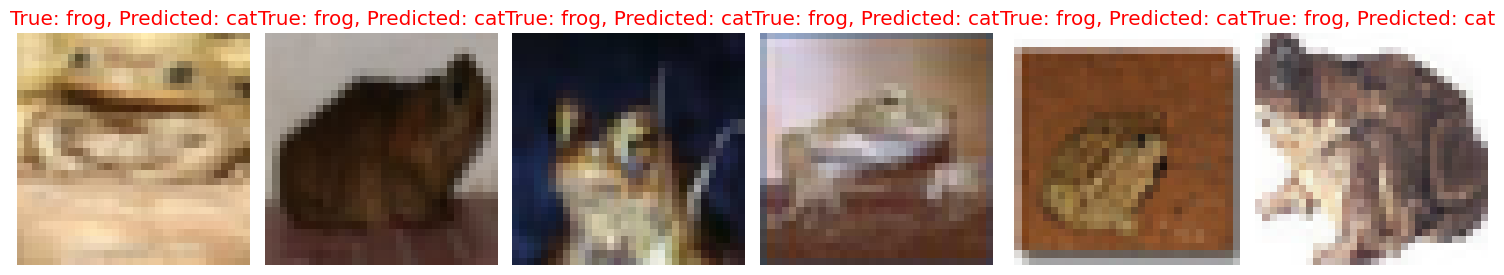

In [ ]:
plot_confused_images(x_test, y_test, predicted_labels, class_names, pred_class, true_class, num_images=6)

Misclassifications of frogs as cats and cats as frogs highlight the similarities in colour and shape between these animals, which can lead to confusion for the model. Due to the similarity between the two classes, the model may have difficulty distinguishing between them based solely on visual cues. This similarity in colour and shape is likely a factor in the model's inability to distinguish between cats and frogs.